In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 132681 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.13-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.13-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.13-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
!mkdir -p Drive
!google-drive-ocamlfuse Drive

### Import

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from itertools import product

# os.chdir('/content/Drive/Colab Notebooks/2019玉山信用卡盜刷比賽')
os.getcwd()

'/home/rossleecooloh/workspace/Tbrain_credit_card_competition'

### Rolloing 函數

In [2]:
# a = np.array([1,2,3,4,5,6,7,8])
# print(a.cumsum())
# b = a.cumsum()
# print(b[3:])
# print(b[:-3])
# print(b[3:] - b[:-3])
# b[3:] = b[3:] - b[:-3]
# b

a = np.array([1,2,3,4,5,6,7,8])

def rolling_window_sum(x, window_size=3):
    cum_x = x.cumsum()
    cum_x[window_size:] = cum_x[window_size:] - cum_x[:-window_size]
    return cum_x

print(rolling_window_sum(a, 3))

def cumsum_mean(x):
    return x.cumsum() / np.arange(1, len(x) + 1)

print(cumsum_mean(a))

def rolling_window_mean(x, window_size=3):
    cum_x = x.cumsum()
    cum_x[window_size:] = cum_x[window_size:] - cum_x[:-window_size]
    return cum_x / np.arange(1, len(x) + 1)

print(rolling_window_mean(a, 4))

def plot_train_test_feature(feature_name):
    X_train = all_features[:-len(test_pre)]
    X_train[feature_name].plot.kde(bw_method=0.1)
    plt.show()
    X_test = all_features[-len(test_pre):]
    X_test[feature_name].plot.kde(bw_method=0.1)
    plt.show()

[ 1  3  6  9 12 15 18 21]
[1.  1.5 2.  2.5 3.  3.5 4.  4.5]
[1.         1.5        2.         2.5        2.8        3.
 3.14285714 3.25      ]


In [3]:
a = pd.Series(np.array([1,2,3,4,7,6,7,8]))
# a.rolling(3, min_periods=3).apply(lambda x: min((x[1] - x[0]), (x[2] - x[1])))
# a.rolling(2, min_periods=2).apply(lambda x: x[1] - x[0])
a.rolling(2, min_periods=2).apply(lambda x: x[0] - x[1])

/home/rossleecooloh/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.


0    NaN
1   -1.0
2   -1.0
3   -1.0
4   -3.0
5    1.0
6   -1.0
7   -1.0
dtype: float64

In [4]:
train_pre = pd.read_csv("pre_train_14.csv")
test_pre = pd.read_csv("pre_test_14.csv")

# train_pre = pd.read_csv("train_pre_31.csv")
# test_pre = pd.read_csv("test_pre_31.csv")

print(train_pre.shape)
print(test_pre.shape)

# x = test_pre[["acqic", "conam"]].groupby("acqic").mean().reset_index()
# x.columns = ["acqic", "conam_mean_by_train_test_acqic"]
# test_pre = pd.merge(test_pre, x, left_on=["acqic"], right_on=["acqic"], how='left')

# x = train_pre[["acqic", "conam"]].groupby("acqic").mean().reset_index()
# x.columns = ["acqic", "conam_mean_by_train_test_acqic"]
# train_pre = pd.merge(train_pre, x, left_on=["acqic"], right_on=["acqic"], how='left')

all_features = pd.concat([train_pre.drop("fraud_ind", axis=1), test_pre])
all_features.head(3)

(1470838, 59)
(421665, 58)


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,ovrlt_value_counts,flbmk_value_counts,hcefg_value_counts,csmcu_value_counts,flg_3dsmk_value_counts,prime_time_normal,prime_time_fraud,sleep_time,sleep_time_conam_lower_3000,prime_time_fraud_conam_lower_3000
0,5975,160800,155123,490.19,5,62,1,8,0,1,...,1868617,1886127,1759496,1553694,81239,0,1,0,0,1
1,5975,97584,55835,1.38,5,62,1,8,0,0,...,1868617,1886127,1759496,1553694,1811264,0,0,0,0,0
2,6777,1884,116943,683.25,5,62,0,5,0,0,...,1868617,1886127,41634,1553694,1811264,1,1,0,0,1


In [6]:
去掉這些人的重複剩下93萬
train_pre.drop_duplicates(subset=['acqic', 'conam', 'contp', 'csmcu', 'ecfg', 'etymd',
       'hcefg', 'insfg', 'iterm', 'mcc',
       'mchno', 'scity', 'stocn', 'stscd'])

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,flbmk_value_counts,hcefg_value_counts,csmcu_value_counts,flg_3dsmk_value_counts,prime_time_normal,prime_time_fraud,sleep_time,sleep_time_conam_lower_3000,prime_time_fraud_conam_lower_3000,fraud_ind
0,5975,160800,155123,490.19,5,62,1,8,0,1,...,1886127,1759496,1553694,81239,0,1,0,0,1,0
1,5975,97584,55835,1.38,5,62,1,8,0,0,...,1886127,1759496,1553694,1811264,0,0,0,0,0,0
2,6777,1884,116943,683.25,5,62,0,5,0,0,...,1886127,41634,1553694,1811264,1,1,0,0,1,0
3,6881,150173,105171,513.80,5,0,0,0,0,0,...,1886127,1759496,217237,1811264,1,1,0,0,1,0
4,0,19942,118919,465.62,5,0,0,2,0,0,...,1886127,64075,217237,1811264,1,0,0,0,0,0
5,6189,138238,22734,254.99,5,62,1,2,0,0,...,1886127,1759496,1553694,1811264,0,1,0,0,1,0
6,5975,112451,31536,531.54,5,62,0,5,0,0,...,1886127,1759496,1553694,1811264,1,1,0,0,1,0
7,5975,39298,46263,874.16,5,62,0,4,0,0,...,1886127,1759496,1553694,1811264,1,1,0,0,1,0
8,5975,91542,32004,8.94,2,62,0,2,0,0,...,1886127,1759496,1553694,1811264,1,1,0,0,1,0
9,6716,157947,9994,1421.35,5,62,0,4,0,0,...,1886127,1759496,1553694,1811264,1,1,0,0,1,0


In [11]:
# # mapping str levels as numeric levels
# str_cols = ['ecfg', 'flbmk', 'flg_3dsmk', 'insfg', 'ovrlt']
# yes_no_dict = {"N": 0, "Y": 1, "0": 0, "1": 1}
# for col in str_cols:
#     # print(all_features[col].replace(yes_no_dict))
#     try:  
#       all_features[col] = all_features[col].replace(yes_no_dict)
# #       X_test[col] = X_test[col].replace(yes_no_dict)
#     except Exception:
#       pass
   
#     all_features[col] = all_features[col].astype(int)
# #     X_test[col] = X_test[col].astype(int)
# all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,conam_r,loctm_hour,loctm_min,loctm_sec,no,total_acc_sec,total_acc_min,total_acc_hour,conam_is_0,bacno_u_cnt_by_acqic,conam_level,loctm_value_counts,loctm_hour_value_counts,csmcu_cnt_by_stocn,csmcu_cnt_by_scity,csmcu_ucnt_by_bacno,bacno_value_counts,cano_value_counts,mchno_value_counts,acqic_value_counts,mcc_value_counts,ecfg_value_counts,insfg_value_counts,contp_value_counts,etymd_value_counts,stocn_value_counts,scity_value_counts,stscd_value_counts,ovrlt_value_counts,flbmk_value_counts,hcefg_value_counts,csmcu_value_counts,flg_3dsmk_value_counts,prime_time_normal,prime_time_fraud,sleep_time,sleep_time_conam_lower_3000,prime_time_fraud_conam_lower_3000
0,6881,113261,38038,514.0,5,0,0,0,0,0,5,0,0,33,172652,457,59333,0,0,102,0,514.0,17,26,52,562561,2914012,48566.866667,809.447778,0,30627,0,39,133636,9,14,3,80,80,41203,126507,131721,1441845,1886098,1740053,166560,1671879,182563,1914883,1913401,1915744,1799275,223903,1837606,1,1,0,0,1
1,0,134508,45725,466.0,5,0,0,2,0,0,0,0,0,9,105114,451,0,0,5817,102,0,466.0,10,51,14,137354,816674,13611.233333,226.853889,0,19252,0,50,152475,9,5,2,23,23,61821,59456,55105,1441845,1886098,1740053,486839,1671879,927954,1914883,1913401,1915744,67168,223903,1837606,1,0,0,0,0
2,6881,15408,188328,514.0,5,0,0,0,0,0,5,0,0,6,152458,457,59333,0,0,102,0,514.0,15,24,58,93879,573898,9564.966667,159.416111,0,30627,0,34,126505,9,14,2,18,18,41203,126507,131721,1441845,1886098,1740053,166560,1671879,182563,1914883,1913401,1915744,1799275,223903,1837606,1,1,0,0,1


### Categorical columns
- bacno 歸戶帳號 (不刪)
- cano 交易卡號 (不刪)
- mchno 特店代號
- acqic 收單行代碼
- contp 交易類別
- etymd 交易型態
- mcc MCC_CODE
- ecfg 網路交易註記
- insfg 分期交易註記
- stocn 消費地國別
- scity 消費城市 --> 考慮刪除?
- stscd 狀態碼
- ovrlt 超額註記碼
- flbmk Fallback 註記
- hcefg 支付形態
- csmcu 消費地幣別
- flg_3dsmk 3DS 交易註記
### Numeric columns
- locdt 授權日期 --> 當類別看，mean encode完刪掉
- loctm 授權時間
- conam 交易金額-台幣(經過轉換)
- iterm 分期期數

In [ ]:
all_features.columns

### TODO: 新增辨識新舊level mismatch的特徵?

In [5]:
# "bacno", "cano", # 把交易日期當類別變數mean encoding on 交易金額 
cat_colnames = ["bacno", "cano", "mchno", "acqic", "mcc", "ecfg", "insfg", "contp", 'etymd', "iterm", 'loctm_hour', 'loctm_min',
       'loctm_sec', "stocn", "scity", "stscd", "ovrlt", "flbmk", "hcefg", "csmcu", "flg_3dsmk", "locdt"]
numeric_colnames = ["conam"]
# 不重要的特徵先隔離出來 --> 轉onehot的也先不加入groupby交易金額
# unwanted_colnames = ['contp', 'iterm', 'ecfg', 'flbmk', 'insfg']
unwanted_colnames = []

#### 超過2個level，但小於20個level的特徵轉one-hot

In [ ]:
col_to_be_removed = []
for col in cat_colnames:
    if (all_features[col].unique().shape[0] > 2) and (all_features[col].unique().shape[0] < 20): 
        print(col)
        # print(all_features[col].unique())
        print(all_features[col].unique().shape[0])
        cat_one_hot = pd.get_dummies(all_features[col])
        cat_one_hot.columns = [col + "_" + str(cat) for cat in range(all_features[col].unique().shape[0])]
        all_features = pd.concat([all_features, cat_one_hot], axis=1)
        col_to_be_removed.append(col)
        # unwanted_colnames.append(col)

print(all_features.shape)

# for r_col in col_to_be_removed:
#     del all_features[r_col]
unwanted_colnames = []
print(all_features.shape)
print(unwanted_colnames)

#### (特徵) 交易金額平均 (by feature mean encode)

In [7]:
ftrs = ["bacno", "cano", "mchno", "acqic", "mcc", "contp", 'etymd', "iterm", 'loctm_hour', 'loctm_min',
       'loctm_sec', "stocn", "scity", "stscd", "csmcu", "locdt"]

for cat_col in ftrs:
    if cat_col not in unwanted_colnames:
        canam_cat_mean = all_features[[cat_col, "conam"]].groupby(cat_col, as_index=False).mean()
        canam_cat_mean = canam_cat_mean.rename(columns={"conam": "conam" + "_mean_by_" + cat_col})
        all_features = pd.merge(all_features, canam_cat_mean, left_on=cat_col, right_on=cat_col, how='left')
print(all_features.shape)
all_features.head(3)

(1892503, 74)


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,conam_mean_by_etymd,conam_mean_by_iterm,conam_mean_by_loctm_hour,conam_mean_by_loctm_min,conam_mean_by_loctm_sec,conam_mean_by_stocn,conam_mean_by_scity,conam_mean_by_stscd,conam_mean_by_csmcu,conam_mean_by_locdt
0,5975,160800,155123,490.19,5,62,1,8,0,1,...,606.738794,639.994697,640.645959,659.446982,655.668154,672.681,679.151703,655.481427,682.687503,681.510414
1,5975,97584,55835,1.38,5,62,1,8,0,0,...,606.738794,639.994697,700.013892,658.327779,656.015572,672.681,679.151703,655.481427,682.687503,635.341892
2,6777,1884,116943,683.25,5,62,0,5,0,0,...,596.160025,639.994697,635.670990,664.564353,656.711057,672.681,679.151703,655.481427,682.687503,664.035169


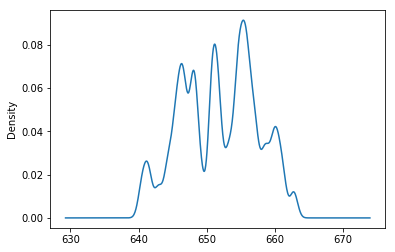

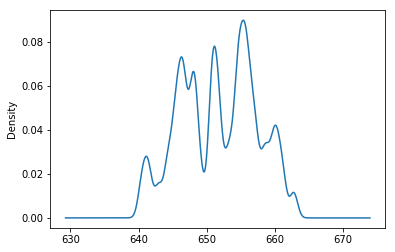

In [0]:
plot_train_test_feature("conam_mean_by_locdt")

#### (特徵) 交易金額最大值 (by feature mean encode)

In [0]:
# for cat_col in cat_colnames:
#     if cat_col not in unwanted_colnames:
#         canam_cat_mean = all_features[[cat_col, "conam"]].groupby(cat_col, as_index=False).max()
#         canam_cat_mean = canam_cat_mean.rename(columns={"conam": "conam" + "_max_by_" + cat_col})
#         all_features = pd.merge(all_features, canam_cat_mean, left_on=cat_col, right_on=cat_col, how='left')
# print(all_features.shape)
# all_features.head(3)

(1938653, 124)


,index,acqic,bacno,cano,conam,csmcu,ecfg,flbmk,flg_3dsmk,insfg,...,conam_max_by_mcc,conam_max_by_locdt,conam_max_by_loctm_hour,conam_max_by_loctm_min,conam_max_by_loctm_sec,conam_max_by_stocn,conam_max_by_scity,conam_max_by_ovrlt,conam_max_by_csmcu,conam_max_by_flg_3dsmk
0,0,6881,113261,38038,513.80,0,0,0,0,0,...,683.25,5075.54,4446.65,4438.05,5075.84,7208.77,3926.89,5866.36,2399.87,7208.77
1,1,0,134508,45725,465.62,0,0,0,0,0,...,465.62,3725.46,7195.84,4453.23,6728.97,7208.77,7208.77,5866.36,2399.87,7208.77
2,2,6881,15408,188328,513.80,0,0,0,0,0,...,683.25,5975.93,5833.70,5278.28,4447.92,7208.77,3926.89,5866.36,2399.87,7208.77


#### 交易金額標準差

In [0]:
# for cat_col in cat_colnames:
#     # print(cat_col)
#     canam_cat_std = all_features[[cat_col, "conam"]].groupby(cat_col, as_index=False).std()
#     canam_cat_std = canam_cat_std.rename(columns={"conam": "conam" + "_std_by_" + cat_col})
#     all_features = pd.merge(all_features, canam_cat_std, left_on=cat_col, right_on=cat_col, how='left')
    
# print(all_features.shape)
# all_features.head(3)

#### 授權時間平均  (by feature mean encode)

In [0]:
# for cat_col in cat_colnames:
#     # print(cat_col)
#     if cat_col not in unwanted_colnames:
#         loctm_cat_mean = all_features[[cat_col, "loctm"]].groupby(cat_col, as_index=False).mean()
#         loctm_cat_mean = loctm_cat_mean.rename(columns={"loctm": "loctm" + "_mean_by_" + cat_col})
#         all_features = pd.merge(all_features, loctm_cat_mean, left_on=cat_col, right_on=cat_col, how='left')
    
# print(all_features.shape)
# all_features.head(3)

(1761621, 45)


,acqic,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,...,loctm_mean_by_mcc,loctm_mean_by_etymd,loctm_mean_by_locdt,loctm_mean_by_stocn,loctm_mean_by_scity,loctm_mean_by_stscd,loctm_mean_by_ovrlt,loctm_mean_by_hcefg,loctm_mean_by_csmcu,loctm_mean_by_flg_3dsmk
0,6881,513.80,5,0,0,0,0,0,5,0,...,148273.860703,143966.866639,138503.020000,147915.978536,143913.598253,146402.181976,146236.221644,147210.939985,135039.792814,146211.813969
1,0,465.62,5,0,0,2,0,0,0,0,...,103074.129415,130328.228719,150402.129153,147915.978536,143593.003056,146402.181976,146236.221644,103568.336250,135039.792814,146211.813969
2,6881,513.80,5,0,0,0,0,0,5,0,...,148273.860703,143966.866639,146146.379331,147915.978536,143913.598253,146402.181976,146236.221644,147210.939985,135039.792814,146211.813969


#### (特徵) 授權時間點counts平均

- 第一層: 授權時間點在整個資料集裡面出現的總次數
- 第二層: (以帳戶為例) 該帳戶每次消費的授權時間點在整個資料集裡面出現的總次數平均
- 直觀理解: 會跟授權時間點在整個資料集裡面出現次數相輔相成，等於該帳戶的1. 這個授權時間點常出現 2. 該帳戶授權時間點次數平均代表有沒有出現過一些低頻的授權時間點

In [24]:
# imp_ftrs = ["bacno", "cano", "mchno", "conam", "acqic", "mcc", "scity", "stscd", "csmcu"]
# # loctm不會再跟自己做第二層了
# for cat_col in cat_colnames:
#     # print(cat_col)
#     if cat_col not in unwanted_colnames and cat_col not in ['loctm_hour', 'loctm_min', 'loctm_sec'] \
#     and cat_col in imp_ftrs:
#         loctm_cnt_mean = all_features[[cat_col, "loctm_value_counts"]].groupby(cat_col, as_index=False).mean()
#         loctm_cnt_mean = loctm_cnt_mean.rename(columns={"loctm_value_counts": "loctm_cnt" + "_mean_by_" + cat_col})
#         all_features = pd.merge(all_features, loctm_cnt_mean, left_on=cat_col, right_on=cat_col, how='left')

# print(all_features.shape)
# all_features.head(3)

(1938653, 172)


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,loctm_hour,loctm_min,loctm_sec,no,total_acc_sec,total_acc_min,total_acc_hour,conam_is_0,cocam_u_cnt_by_acqic,bacno_u_cnt_by_acqic,conam_level,loctm_value_counts,loctm_hour_value_counts,csmcu_cnt_by_stocn,csmcu_cnt_by_scity,csmcu_ucnt_by_bacno,bacno_value_counts,cano_value_counts,mchno_value_counts,...,hcefg_0,hcefg_1,hcefg_2,hcefg_3,hcefg_4,hcefg_5,hcefg_6,hcefg_7,hcefg_8,hcefg_9,conam_mean_by_bacno,conam_mean_by_cano,conam_mean_by_mchno,conam_mean_by_acqic,conam_mean_by_mcc,conam_mean_by_ecfg,conam_mean_by_insfg,conam_mean_by_contp,conam_mean_by_etymd,conam_mean_by_iterm,conam_mean_by_loctm_hour,conam_mean_by_loctm_min,conam_mean_by_loctm_sec,conam_mean_by_stocn,conam_mean_by_scity,conam_mean_by_stscd,conam_mean_by_ovrlt,conam_mean_by_flbmk,conam_mean_by_hcefg,conam_mean_by_csmcu,conam_mean_by_flg_3dsmk,conam_mean_by_locdt,loctm_cnt_mean_by_bacno,loctm_cnt_mean_by_cano,loctm_cnt_mean_by_mchno,loctm_cnt_mean_by_acqic,loctm_cnt_mean_by_mcc,loctm_cnt_mean_by_scity,loctm_cnt_mean_by_stscd,loctm_cnt_mean_by_csmcu
0,6881,113261,38038,513.80,5,0,0,0,0,0,5,0,0,33,172652,457,59333,0,0,102,0,17,26,52,562650,2914012,48566.866667,809.447778,0,3.0,30627,0,39,133644,9,14,3,80,80,41203,...,0,0,0,0,0,1,0,0,0,0,569.710625,569.710625,515.913858,516.280419,520.906246,663.382567,636.317641,642.070115,501.944951,636.328623,644.916617,660.011903,650.872520,670.409075,488.192335,651.810231,648.45153,651.222606,670.006128,484.287384,647.868952,744.039495,32.612500,32.612500,28.789384,31.159090,31.252936,31.138777,32.37834,36.959916
1,0,134508,45725,465.62,5,0,0,2,0,0,0,0,0,9,105114,451,0,0,5817,102,0,10,51,14,137376,816674,13611.233333,226.853889,0,130.0,19252,0,50,152491,9,5,2,23,23,61822,...,1,0,0,0,0,0,0,0,0,0,648.242609,648.242609,490.850405,439.442989,465.620000,663.382567,636.317641,642.070115,673.374021,636.328623,619.386475,653.527407,649.432976,670.409075,676.955873,651.810231,648.45153,651.222606,421.024395,484.287384,647.868952,649.387032,35.956522,35.956522,51.921808,52.530081,54.275977,33.615969,32.37834,36.959916
2,6881,15408,188328,513.80,5,0,0,0,0,0,5,0,0,6,152458,457,59333,0,0,102,0,15,24,58,93895,573898,9564.966667,159.416111,0,3.0,30627,0,34,126522,9,14,2,18,18,41203,...,0,0,0,0,0,1,0,0,0,0,659.223333,659.223333,515.913858,516.280419,520.906246,663.382567,636.317641,642.070115,501.944951,636.328623,695.431427,655.950615,653.588988,670.409075,488.192335,651.810231,648.45153,651.222606,670.006128,484.287384,647.868952,644.352319,27.055556,27.055556,28.789384,31.159090,31.252936,31.138777,32.37834,36.959916


#### (特徵) by 帳戶的各種unique count

In [8]:
# "bacno", "cano", 
ftrs = ["mchno", "conam", "acqic", "mcc", "scity", "stscd", "csmcu"]
for col in ftrs:
    by_bacno_uique_count = all_features[["bacno", col]].groupby("bacno")[col].apply(lambda x: np.unique(x).shape[0])
    by_bacno_uique_count = pd.DataFrame(by_bacno_uique_count).reset_index()

    by_bacno_uique_count.columns = ["bacno", col + "_uique_count_by_bacno"]

    all_features = pd.merge(all_features, by_bacno_uique_count, left_on=['bacno'], 
                          right_on=['bacno'], how='left')
all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,conam_mean_by_stscd,conam_mean_by_csmcu,conam_mean_by_locdt,mchno_uique_count_by_bacno,conam_uique_count_by_bacno,acqic_uique_count_by_bacno,mcc_uique_count_by_bacno,scity_uique_count_by_bacno,stscd_uique_count_by_bacno,csmcu_uique_count_by_bacno
0,5975,160800,155123,490.19,5,62,1,8,0,1,...,655.481427,682.687503,681.510414,10,16,6,7,3,1,1
1,5975,97584,55835,1.38,5,62,1,8,0,0,...,655.481427,682.687503,635.341892,16,17,9,13,9,1,3
2,6777,1884,116943,683.25,5,62,0,5,0,0,...,655.481427,682.687503,664.035169,24,29,12,18,12,2,4


### TODO: 最後再篩選一次，例如雜訊特徵，只有single value的就去除

#### 交易日期counts平均  (by feature mean encode)

In [0]:
# for cat_col in cat_colnames:
#     # print(cat_col)
#     if cat_col not in unwanted_colnames and cat_col != "locdt":
#         locdt_cnt_mean = all_features[[cat_col, "locdt_value_counts"]].groupby(cat_col, as_index=False).mean()
#         locdt_cnt_mean = locdt_cnt_mean.rename(columns={"locdt_value_counts": "locdt_cnt" + "_mean_by_" + cat_col})
#         all_features = pd.merge(all_features, locdt_cnt_mean, left_on=cat_col, right_on=cat_col, how='left')
    
# print(all_features.shape)
# all_features.head(3)

#### 授權時間標準差

In [0]:
# for cat_col in cat_colnames:
#     # print(cat_col)
#     loctm_cat_std = all_features[[cat_col, "loctm"]].groupby(cat_col, as_index=False).std()
#     loctm_cat_std = loctm_cat_std.rename(columns={"loctm": "loctm" + "_std_by_" + cat_col})
#     all_features = pd.merge(all_features, loctm_cat_std, left_on=cat_col, right_on=cat_col, how='left')

# print(all_features.shape)
# all_features.head(3)

#### (特徵) 帳號用不同卡交易總次數(by帳號看交易卡號出現次數)

In [0]:
# cano_cnt_by_bacon = pd.DataFrame(all_features[["bacno", "cano"]].groupby("bacno").count()).reset_index()
# cano_cnt_by_bacon.columns = ["bacno", "cano_cnt_by_bacon"]

# all_features = pd.merge(all_features, cano_cnt_by_bacon, left_on='bacno', right_on="bacno", how='left')
# all_features.head(3)

,acqic,bacno,cano,conam,csmcu,ecfg,flbmk,flg_3dsmk,insfg,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,loctm_hour,loctm_min,loctm_sec,no,total_acc_sec,total_acc_min,total_acc_hour,conam_is_0,cocam_u_cnt_by_acqic,bacno_u_cnt_by_acqic,conam_level,loctm_value_counts,loctm_hour_value_counts,csmcu_cnt_by_stocn,csmcu_cnt_by_scity,csmcu_ucnt_by_bacno,bacno_value_counts,cano_value_counts,mchno_value_counts,acqic_value_counts,mcc_value_counts,ecfg_value_counts,insfg_value_counts,contp_value_counts,...,iterm_6,iterm_7,iterm_8,stscd_0,stscd_1,stscd_2,stscd_3,stscd_4,hcefg_0,hcefg_1,hcefg_2,hcefg_3,hcefg_4,hcefg_5,hcefg_6,hcefg_7,hcefg_8,hcefg_9,conam_mean_by_bacno,conam_mean_by_cano,conam_mean_by_mchno,conam_mean_by_acqic,conam_mean_by_mcc,conam_mean_by_loctm_hour,conam_mean_by_loctm_min,conam_mean_by_loctm_sec,conam_mean_by_stocn,conam_mean_by_scity,conam_mean_by_ovrlt,conam_mean_by_csmcu,conam_mean_by_flg_3dsmk,conam_mean_by_locdt,loctm_cnt_mean_by_bacno,loctm_cnt_mean_by_cano,loctm_cnt_mean_by_mchno,loctm_cnt_mean_by_acqic,loctm_cnt_mean_by_mcc,loctm_cnt_mean_by_scity,loctm_cnt_mean_by_csmcu,cano_cnt_by_bacon
0,6881,113261,38038,513.80,0,0,0,0,0,33,172652,457,59333,0,0,102,17,26,52,562650,2914012,48566.866667,809.447778,0,3.0,30627,0,39,133644,9,14,3,80,80,41203,126507,131721,1441938,1886330,1740253,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,569.710625,569.710625,515.913858,516.280419,520.906246,644.916617,660.011903,650.872520,670.409075,488.192335,648.45153,484.287384,647.868952,744.039495,32.612500,32.612500,28.789384,31.159090,31.252936,31.138777,36.959916,80
1,0,134508,45725,465.62,0,0,0,0,0,9,105114,451,0,0,5817,102,10,51,14,137376,816674,13611.233333,226.853889,0,130.0,19252,0,50,152491,9,5,2,23,23,61822,59457,55106,1441938,1886330,1740253,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,648.242609,648.242609,490.850405,439.442989,465.620000,619.386475,653.527407,649.432976,670.409075,676.955873,648.45153,484.287384,647.868952,649.387032,35.956522,35.956522,51.921808,52.530081,54.275977,33.615969,36.959916,23
2,6881,15408,188328,513.80,0,0,0,0,0,6,152458,457,59333,0,0,102,15,24,58,93895,573898,9564.966667,159.416111,0,3.0,30627,0,34,126522,9,14,2,18,18,41203,126507,131721,1441938,1886330,1740253,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,659.223333,659.223333,515.913858,516.280419,520.906246,695.431427,655.950615,653.588988,670.409075,488.192335,648.45153,484.287384,647.868952,644.352319,27.055556,27.055556,28.789384,31.159090,31.252936,31.138777,36.959916,18


#### (特徵) 帳號&卡號綁一起的交易總次數

In [9]:
bacon_cano_cnt = pd.DataFrame(all_features[["bacno", "cano"]].groupby(["bacno", "cano"]).size()).reset_index()
bacon_cano_cnt.columns = ["bacno", "cano", "bacon_cano_cnt"]

all_features = pd.merge(all_features, bacon_cano_cnt, left_on=["bacno", "cano"], right_on=["bacno", "cano"], how='left')
all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,conam_mean_by_csmcu,conam_mean_by_locdt,mchno_uique_count_by_bacno,conam_uique_count_by_bacno,acqic_uique_count_by_bacno,mcc_uique_count_by_bacno,scity_uique_count_by_bacno,stscd_uique_count_by_bacno,csmcu_uique_count_by_bacno,bacon_cano_cnt
0,5975,160800,155123,490.19,5,62,1,8,0,1,...,682.687503,681.510414,10,16,6,7,3,1,1,14
1,5975,97584,55835,1.38,5,62,1,8,0,0,...,682.687503,635.341892,16,17,9,13,9,1,3,17
2,6777,1884,116943,683.25,5,62,0,5,0,0,...,682.687503,664.035169,24,29,12,18,12,2,4,14


#### 帳戶該筆刷卡前的3次內累積金額 (後來綁帳戶&卡號)

In [0]:
# # locdt排序 then 算groupby bacno 前3筆
# bacno_3_times_conam_mean = all_features[["locdt", "bacno", "conam"]].sort_values("locdt").\
#                     groupby(["bacno"])["conam"].apply(lambda x: x[-4:-1].sum())
# bacno_3_times_conam_mean = pd.DataFrame(bacno_3_times_conam_mean).reset_index()
# bacno_3_times_conam_mean.columns = ["bacno", "bacno_3_times_conam_mean"]

# all_features = pd.merge(all_features, bacno_3_times_conam_mean, left_on='bacno', right_on="bacno", how='left')
# all_features.head(3)

,acqic,bacno,cano,conam,csmcu,ecfg,flbmk,flg_3dsmk,insfg,locdt,...,conam_mean_by_flg_3dsmk,loctm_cnt_mean_by_bacno,loctm_cnt_mean_by_cano,loctm_cnt_mean_by_mchno,loctm_cnt_mean_by_acqic,loctm_cnt_mean_by_mcc,loctm_cnt_mean_by_scity,loctm_cnt_mean_by_csmcu,cano_cnt_by_bacon,bacno_3_times_conam_mean
0,6881,113261,38038,513.80,0,0,0,0,0,33,...,647.868952,32.612500,32.612500,28.789384,31.159090,31.252936,31.138777,36.959916,80,0.00
1,0,134508,45725,465.62,0,0,0,0,0,9,...,647.868952,35.956522,35.956522,51.921808,52.530081,54.275977,33.615969,36.959916,23,1396.86
2,6881,15408,188328,513.80,0,0,0,0,0,6,...,647.868952,27.055556,27.055556,28.789384,31.159090,31.252936,31.138777,36.959916,18,1755.99


#### 帳戶該筆刷卡前的7次內累積金額 (後來綁帳戶&卡號)

In [0]:
# # locdt排序 then 算groupby bacno 前7筆
# bacno_7_times_conam_mean = all_features[["locdt", "bacno", "conam"]].sort_values("locdt").\
#                     groupby(["bacno"])["conam"].apply(lambda x: x[-8:-1].sum())
# bacno_7_times_conam_mean = pd.DataFrame(bacno_7_times_conam_mean).reset_index()
# bacno_7_times_conam_mean.columns = ["bacno", "bacno_7_times_conam_mean"]

# all_features = pd.merge(all_features, bacno_7_times_conam_mean, left_on='bacno', right_on="bacno", how='left')
# all_features.head(10)

,index,acqic,bacno,cano,conam,csmcu,ecfg,flbmk,flg_3dsmk,insfg,...,conam_mean_by_flg_3dsmk,loctm_cnt_mean_by_bacno,loctm_cnt_mean_by_cano,loctm_cnt_mean_by_mchno,loctm_cnt_mean_by_acqic,loctm_cnt_mean_by_mcc,loctm_cnt_mean_by_scity,loctm_cnt_mean_by_csmcu,cano_cnt_by_bacon,bacon_cano_cnt
0,0,6881,113261,38038,513.80,0,0,0,0,0,...,647.676943,32.687500,32.687500,28.855059,31.222241,31.316191,31.202420,37.367194,80,80
1,1,0,134508,45725,465.62,0,0,0,0,0,...,647.676943,36.217391,36.217391,52.765172,53.384337,55.133381,33.781803,37.367194,23,23
2,2,6881,15408,188328,513.80,0,0,0,0,0,...,647.676943,27.166667,27.166667,28.855059,31.222241,31.316191,31.202420,37.367194,18,18
3,3,6716,157159,29967,1016.11,62,0,0,0,0,...,647.676943,35.662162,37.421053,35.516385,33.152770,33.118993,34.414564,32.092869,74,57
4,4,5975,105985,81305,713.66,62,0,0,0,0,...,647.676943,34.615385,35.142857,31.500000,32.290119,31.442288,33.781803,32.092869,78,63
5,5,0,78377,2295,465.62,0,0,0,0,0,...,647.676943,38.178571,38.178571,52.765172,53.384337,55.133381,33.781803,37.367194,28,28
6,6,6411,94435,49219,1806.49,62,0,0,0,0,...,647.676943,29.666667,29.666667,52.765172,31.700787,30.553038,31.700787,32.092869,3,3
7,7,6769,112032,177989,526.88,62,0,0,0,0,...,647.676943,38.714286,38.714286,24.124153,32.767217,26.115805,33.781803,32.092869,84,84
8,8,6092,92294,85535,201.39,62,0,0,0,0,...,647.676943,29.000000,29.000000,28.905172,32.660938,30.966311,29.087248,32.092869,6,6
9,9,0,16279,110755,465.62,0,0,0,0,0,...,647.676943,49.833333,57.000000,52.765172,53.384337,55.133381,33.781803,37.367194,6,4


#### (特徵) 該帳戶該卡號該筆刷卡前所有金額累加

In [0]:
# bacno_cano_conam_cumsum = all_features[["no", "bacno", "cano", "conam"]].sort_values("no").\
#                     groupby(["bacno", "cano"])["conam"].apply(lambda x: x.cumsum())

# bacno_cano_conam_cumsum = pd.DataFrame(bacno_cano_conam_cumsum).reset_index()
# bacno_cano_conam_cumsum.columns = ["index", "bacno_cano_conam_cumsum"]
# all_features = pd.merge(all_features, bacno_cano_conam_cumsum, left_on="index", 
#                         right_on="index", how='left')
# all_features.head(3)

,index,acqic,bacno,cano,conam,csmcu,ecfg,flbmk,flg_3dsmk,insfg,...,loctm_cnt_mean_by_bacno,loctm_cnt_mean_by_cano,loctm_cnt_mean_by_mchno,loctm_cnt_mean_by_acqic,loctm_cnt_mean_by_mcc,loctm_cnt_mean_by_scity,loctm_cnt_mean_by_csmcu,cano_cnt_by_bacon,bacon_cano_cnt,bacno_cano_conam_cumsum
0,0,6881,113261,38038,513.80,0,0,0,0,0,...,32.612500,32.612500,28.789384,31.159090,31.252936,31.138777,36.959916,80,80,12427.89
1,1,0,134508,45725,465.62,0,0,0,0,0,...,35.956522,35.956522,51.921808,52.530081,54.275977,33.615969,36.959916,23,23,2350.85
2,2,6881,15408,188328,513.80,0,0,0,0,0,...,27.055556,27.055556,28.789384,31.159090,31.252936,31.138777,36.959916,18,18,513.80


#### (特徵) 該帳戶該卡號該筆刷卡前所有金額平均

In [0]:
# bacno_cano_conam_cumsum_mean = all_features[["no", "bacno", "cano", "conam"]].sort_values("no").\
#                     groupby(["bacno", "cano"])["conam"].apply(lambda x: cumsum_mean(x))

# bacno_cano_conam_cumsum_mean = pd.DataFrame(bacno_cano_conam_cumsum_mean).reset_index()
# bacno_cano_conam_cumsum_mean.columns = ["no", "bacno_cano_conam_cumsum_mean"]

# all_features = pd.merge(all_features, bacno_cano_conam_cumsum_mean, left_on="no", 
#                         right_on="no", how='left')
# all_features.head(3)

,acqic,bacno,cano,conam,csmcu,ecfg,flbmk,flg_3dsmk,insfg,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,loctm_hour,loctm_min,loctm_sec,no,total_acc_sec,total_acc_min,total_acc_hour,conam_is_0,cocam_u_cnt_by_acqic,bacno_u_cnt_by_acqic,conam_level,loctm_value_counts,loctm_hour_value_counts,csmcu_cnt_by_stocn,csmcu_cnt_by_scity,csmcu_ucnt_by_bacno,bacno_value_counts,cano_value_counts,mchno_value_counts,acqic_value_counts,mcc_value_counts,ecfg_value_counts,insfg_value_counts,contp_value_counts,...,iterm_7,iterm_8,stscd_0,stscd_1,stscd_2,stscd_3,stscd_4,hcefg_0,hcefg_1,hcefg_2,hcefg_3,hcefg_4,hcefg_5,hcefg_6,hcefg_7,hcefg_8,hcefg_9,conam_mean_by_bacno,conam_mean_by_cano,conam_mean_by_mchno,conam_mean_by_acqic,conam_mean_by_mcc,conam_mean_by_loctm_hour,conam_mean_by_loctm_min,conam_mean_by_loctm_sec,conam_mean_by_stocn,conam_mean_by_scity,conam_mean_by_ovrlt,conam_mean_by_csmcu,conam_mean_by_flg_3dsmk,conam_mean_by_locdt,loctm_cnt_mean_by_bacno,loctm_cnt_mean_by_cano,loctm_cnt_mean_by_mchno,loctm_cnt_mean_by_acqic,loctm_cnt_mean_by_mcc,loctm_cnt_mean_by_scity,loctm_cnt_mean_by_csmcu,bacon_cano_cnt,bacno_cano_conam_cumsum_mean
0,6881,113261,38038,513.80,0,0,0,0,0,33,172652,457,59333,0,0,102,17,26,52,562650,2914012,48566.866667,809.447778,0,3.0,30627,0,39,133644,9,14,3,80,80,41203,126507,131721,1441938,1886330,1740253,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,569.710625,569.710625,515.913858,516.280419,520.906246,644.916617,660.011903,650.872520,670.409075,488.192335,648.45153,484.287384,647.868952,744.039495,32.612500,32.612500,28.789384,31.159090,31.252936,31.138777,36.959916,80,561.301096
1,0,134508,45725,465.62,0,0,0,0,0,9,105114,451,0,0,5817,102,10,51,14,137376,816674,13611.233333,226.853889,0,130.0,19252,0,50,152491,9,5,2,23,23,61822,59457,55106,1441938,1886330,1740253,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,648.242609,648.242609,490.850405,439.442989,465.620000,619.386475,653.527407,649.432976,670.409075,676.955873,648.45153,484.287384,647.868952,649.387032,35.956522,35.956522,51.921808,52.530081,54.275977,33.615969,36.959916,23,355.962083
2,6881,15408,188328,513.80,0,0,0,0,0,6,152458,457,59333,0,0,102,15,24,58,93895,573898,9564.966667,159.416111,0,3.0,30627,0,34,126522,9,14,2,18,18,41203,126507,131721,1441938,1886330,1740253,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,659.223333,659.223333,515.913858,516.280419,520.906246,695.431427,655.950615,653.588988,670.409075,488.192335,648.45153,484.287384,647.868952,644.352319,27.055556,27.055556,28.789384,31.159090,31.252936,31.138777,36.959916,18,552.063333


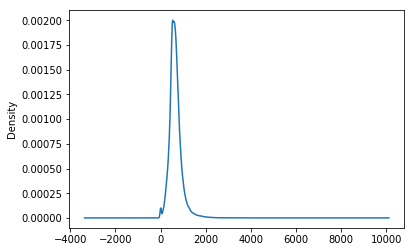

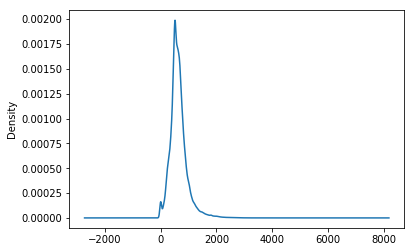

In [0]:
plot_train_test_feature("bacno_cano_conam_cumsum_mean")

#### TODO: 包含自己by "天" 的金額加總、平均、最大值

#### (特徵) 該帳戶該卡號該筆刷卡的包含自己3次金額加總
https://blog.csdn.net/wj1066/article/details/78853717 

In [0]:
# bacno_cano_conam_rolling_3_window_sum = all_features[["no", "bacno", "cano", "conam"]].sort_values("no").\
#                     groupby(["bacno", "cano"])["conam"].apply(lambda x: x.rolling(3, min_periods=1).sum())

# bacno_cano_conam_rolling_3_window_sum = pd.DataFrame(bacno_cano_conam_rolling_3_window_sum).reset_index()
# bacno_cano_conam_rolling_3_window_sum.columns = ["no", "bacno_cano_conam_rolling_3_window_sum"]

# all_features = pd.merge(all_features, bacno_cano_conam_rolling_3_window_sum, left_on="no", 
#                         right_on="no", how='left')
# all_features.head(3)

,acqic,bacno,cano,conam,csmcu,ecfg,flbmk,flg_3dsmk,insfg,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,loctm_hour,loctm_min,loctm_sec,no,total_acc_sec,total_acc_min,total_acc_hour,conam_is_0,cocam_u_cnt_by_acqic,bacno_u_cnt_by_acqic,conam_level,loctm_value_counts,loctm_hour_value_counts,csmcu_cnt_by_stocn,csmcu_cnt_by_scity,csmcu_ucnt_by_bacno,bacno_value_counts,cano_value_counts,mchno_value_counts,acqic_value_counts,mcc_value_counts,ecfg_value_counts,insfg_value_counts,contp_value_counts,...,stscd_0,stscd_1,stscd_2,stscd_3,stscd_4,hcefg_0,hcefg_1,hcefg_2,hcefg_3,hcefg_4,hcefg_5,hcefg_6,hcefg_7,hcefg_8,hcefg_9,conam_mean_by_bacno,conam_mean_by_cano,conam_mean_by_mchno,conam_mean_by_acqic,conam_mean_by_mcc,conam_mean_by_loctm_hour,conam_mean_by_loctm_min,conam_mean_by_loctm_sec,conam_mean_by_stocn,conam_mean_by_scity,conam_mean_by_ovrlt,conam_mean_by_csmcu,conam_mean_by_flg_3dsmk,conam_mean_by_locdt,loctm_cnt_mean_by_bacno,loctm_cnt_mean_by_cano,loctm_cnt_mean_by_mchno,loctm_cnt_mean_by_acqic,loctm_cnt_mean_by_mcc,loctm_cnt_mean_by_scity,loctm_cnt_mean_by_csmcu,cano_cnt_by_bacon,bacon_cano_cnt,bacno_cano_conam_cumsum_mean,bacno_cano_conam_rolling_3_window_sum
0,6881,113261,38038,513.80,0,0,0,0,0,33,172652,457,59333,0,0,102,17,26,52,562650,2914012,48566.866667,809.447778,0,3.0,30627,0,39,133644,9,14,3,80,80,41203,126507,131721,1441938,1886330,1740253,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,569.710625,569.710625,515.913858,516.280419,520.906246,644.916617,660.011903,650.872520,670.409075,488.192335,648.45153,484.287384,647.868952,744.039495,32.612500,32.612500,28.789384,31.159090,31.252936,31.138777,36.959916,80,80,561.301096,1725.89
1,0,134508,45725,465.62,0,0,0,0,0,9,105114,451,0,0,5817,102,10,51,14,137376,816674,13611.233333,226.853889,0,130.0,19252,0,50,152491,9,5,2,23,23,61822,59457,55106,1441938,1886330,1740253,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,648.242609,648.242609,490.850405,439.442989,465.620000,619.386475,653.527407,649.432976,670.409075,676.955873,648.45153,484.287384,647.868952,649.387032,35.956522,35.956522,51.921808,52.530081,54.275977,33.615969,36.959916,23,23,355.962083,703.98
2,6881,15408,188328,513.80,0,0,0,0,0,6,152458,457,59333,0,0,102,15,24,58,93895,573898,9564.966667,159.416111,0,3.0,30627,0,34,126522,9,14,2,18,18,41203,126507,131721,1441938,1886330,1740253,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,659.223333,659.223333,515.913858,516.280419,520.906246,695.431427,655.950615,653.588988,670.409075,488.192335,648.45153,484.287384,647.868952,644.352319,27.055556,27.055556,28.789384,31.159090,31.252936,31.138777,36.959916,18,18,552.063333,1650.12


#### (特徵) 該帳戶該卡號該筆刷卡的包含自己3次金額平均

In [0]:
# bacno_cano_conam_rolling_3_window_mean = all_features[["no", "bacno", "cano", "conam"]].sort_values("no").\
#                     groupby(["bacno", "cano"])["conam"].apply(lambda x: x.rolling(3, min_periods=1).mean())

# bacno_cano_conam_rolling_3_window_mean = pd.DataFrame(bacno_cano_conam_rolling_3_window_mean).reset_index()
# bacno_cano_conam_rolling_3_window_mean.columns = ["no", "bacno_cano_conam_rolling_3_window_mean"]

# all_features = pd.merge(all_features, bacno_cano_conam_rolling_3_window_mean, left_on="no", 
#                         right_on="no", how='left')
# all_features.head(3)

,acqic,bacno,cano,conam,csmcu,ecfg,flbmk,flg_3dsmk,insfg,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,loctm_hour,loctm_min,loctm_sec,no,total_acc_sec,total_acc_min,total_acc_hour,conam_is_0,cocam_u_cnt_by_acqic,bacno_u_cnt_by_acqic,conam_level,loctm_value_counts,loctm_hour_value_counts,csmcu_cnt_by_stocn,csmcu_cnt_by_scity,csmcu_ucnt_by_bacno,bacno_value_counts,cano_value_counts,mchno_value_counts,acqic_value_counts,mcc_value_counts,ecfg_value_counts,insfg_value_counts,contp_value_counts,...,stscd_1,stscd_2,stscd_3,stscd_4,hcefg_0,hcefg_1,hcefg_2,hcefg_3,hcefg_4,hcefg_5,hcefg_6,hcefg_7,hcefg_8,hcefg_9,conam_mean_by_bacno,conam_mean_by_cano,conam_mean_by_mchno,conam_mean_by_acqic,conam_mean_by_mcc,conam_mean_by_loctm_hour,conam_mean_by_loctm_min,conam_mean_by_loctm_sec,conam_mean_by_stocn,conam_mean_by_scity,conam_mean_by_ovrlt,conam_mean_by_csmcu,conam_mean_by_flg_3dsmk,conam_mean_by_locdt,loctm_cnt_mean_by_bacno,loctm_cnt_mean_by_cano,loctm_cnt_mean_by_mchno,loctm_cnt_mean_by_acqic,loctm_cnt_mean_by_mcc,loctm_cnt_mean_by_scity,loctm_cnt_mean_by_csmcu,cano_cnt_by_bacon,bacon_cano_cnt,bacno_cano_conam_cumsum_mean,bacno_cano_conam_rolling_3_window_sum,bacno_cano_conam_rolling_3_window_mean
0,6881,113261,38038,513.80,0,0,0,0,0,33,172652,457,59333,0,0,102,17,26,52,562650,2914012,48566.866667,809.447778,0,3.0,30627,0,39,133644,9,14,3,80,80,41203,126507,131721,1441938,1886330,1740253,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,569.710625,569.710625,515.913858,516.280419,520.906246,644.916617,660.011903,650.872520,670.409075,488.192335,648.45153,484.287384,647.868952,744.039495,32.612500,32.612500,28.789384,31.159090,31.252936,31.138777,36.959916,80,80,561.301096,1725.89,575.296667
1,0,134508,45725,465.62,0,0,0,0,0,9,105114,451,0,0,5817,102,10,51,14,137376,816674,13611.233333,226.853889,0,130.0,19252,0,50,152491,9,5,2,23,23,61822,59457,55106,1441938,1886330,1740253,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,648.242609,648.242609,490.850405,439.442989,465.620000,619.386475,653.527407,649.432976,670.409075,676.955873,648.45153,484.287384,647.868952,649.387032,35.956522,35.956522,51.921808,52.530081,54.275977,33.615969,36.959916,23,23,355.962083,703.98,234.660000
2,6881,15408,188328,513.80,0,0,0,0,0,6,152458,457,59333,0,0,102,15,24,58,93895,573898,9564.966667,159.416111,0,3.0,30627,0,34,126522,9,14,2,18,18,41203,126507,131721,1441938,1886330,1740253,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,659.223333,659.223333,515.913858,516.280419,520.906246,695.431427,655.950615,653.588988,670.409075,488.192335,648.45153,484.287384,647.868952,644.352319,27.055556,27.055556,28.789384,31.159090,31.252936,31.138777,36.959916,18,18,552.063333,1650.12,550.040000


#### (特徵) 該帳戶該卡號該筆刷卡的最後幾天挑3筆金額加總 -> 盜刷後停卡

In [0]:
# locdt排序 then 算groupby bacno, cano 前3筆
# bacno_cano_3_times_conam_sum = all_features[["locdt", "bacno", "cano", "conam"]].sort_values("locdt").\
#                     groupby(["bacno", "cano"])["conam"].apply(lambda x: x[-4:-1].sum())

# bacno_cano_3_times_conam_sum = pd.DataFrame(bacno_cano_3_times_conam_sum).reset_index()
# bacno_cano_3_times_conam_sum.columns = ["bacno", "cano", "bacno_cano_3_times_conam_sum"]

# all_features = pd.merge(all_features, bacno_cano_3_times_conam_sum, left_on=['bacno', 'cano'], 
#                         right_on=['bacno', 'cano'], how='left')
# all_features.head(3)

,index,acqic,bacno,cano,conam,csmcu,ecfg,flbmk,flg_3dsmk,insfg,...,loctm_cnt_mean_by_mcc,loctm_cnt_mean_by_scity,loctm_cnt_mean_by_csmcu,cano_cnt_by_bacon,bacon_cano_cnt,bacno_cano_conam_cumsum,bacno_cano_conam_cumsum_mean,bacno_cano_conam_rolling_3_window_sum,bacno_cano_conam_rolling_3_window_mean,bacno_cano_3_times_conam_sum
0,0,6881,113261,38038,513.80,0,0,0,0,0,...,31.252936,31.138777,36.959916,80,80,12427.89,564.904091,1541.40,513.80,0.00
1,1,0,134508,45725,465.62,0,0,0,0,0,...,54.275977,33.615969,36.959916,23,23,2350.85,587.712500,1765.29,588.43,1396.86
2,2,6881,15408,188328,513.80,0,0,0,0,0,...,31.252936,31.138777,36.959916,18,18,513.80,513.800000,513.80,513.80,1755.99


#### (特徵) 該帳戶該卡號該筆刷卡的挑最後3筆金額加總

In [0]:
# # locdt排序 then 算groupby bacno, cano 前3筆
# bacno_cano_3_times_conam_sum_by_no = all_features[["no", "bacno", "cano", "conam"]].sort_values("no").\
#                     groupby(["bacno", "cano"])["conam"].apply(lambda x: x[-4:-1].sum())

# bacno_cano_3_times_conam_sum_by_no = pd.DataFrame(bacno_cano_3_times_conam_sum_by_no).reset_index()
# bacno_cano_3_times_conam_sum_by_no.columns = ["bacno", "cano", "bacno_cano_3_times_conam_sum_by_no"]

# all_features = pd.merge(all_features, bacno_cano_3_times_conam_sum_by_no, left_on=['bacno', 'cano'], 
#                         right_on=['bacno', 'cano'], how='left')
# all_features.head(3)

#### TODO: (特徵) by帳戶的各項特徵(unique count)

#### (特徵) by帳戶的loctm unique count

In [10]:
bacno_cano_loctm_uique_count = all_features[["bacno", "cano", "loctm_hour"]].groupby(["bacno", "cano"])["loctm_hour"].apply(lambda x: np.unique(x).shape[0])
bacno_cano_loctm_uique_count = pd.DataFrame(bacno_cano_loctm_uique_count).reset_index()

bacno_cano_loctm_uique_count.columns = ["bacno", "cano", "bacno_cano_loctm_uique_count"]

all_features = pd.merge(all_features, bacno_cano_loctm_uique_count, left_on=['bacno', 'cano'], 
                        right_on=['bacno', 'cano'], how='left')
all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,conam_mean_by_locdt,mchno_uique_count_by_bacno,conam_uique_count_by_bacno,acqic_uique_count_by_bacno,mcc_uique_count_by_bacno,scity_uique_count_by_bacno,stscd_uique_count_by_bacno,csmcu_uique_count_by_bacno,bacon_cano_cnt,bacno_cano_loctm_uique_count
0,5975,160800,155123,490.19,5,62,1,8,0,1,...,681.510414,10,16,6,7,3,1,1,14,9
1,5975,97584,55835,1.38,5,62,1,8,0,0,...,635.341892,16,17,9,13,9,1,3,17,8
2,6777,1884,116943,683.25,5,62,0,5,0,0,...,664.035169,24,29,12,18,12,2,4,14,8


#### TODO: (特徵) 交易前是否有重複金額出現

#### (特徵) 該帳戶該卡號該筆刷卡的包含自己7次金額加總

In [0]:
# bacno_cano_conam_rolling_7_window_sum = all_features[["no", "bacno", "cano", "conam"]].sort_values("no").\
#                     groupby(["bacno", "cano"])["conam"].apply(lambda x: x.rolling(7, min_periods=1).sum())

# bacno_cano_conam_rolling_7_window_sum = pd.DataFrame(bacno_cano_conam_rolling_7_window_sum).reset_index()
# bacno_cano_conam_rolling_7_window_sum.columns = ["no", "bacno_cano_conam_rolling_7_window_sum"]

# all_features = pd.merge(all_features, bacno_cano_conam_rolling_7_window_sum, left_on="no", 
#                         right_on="no", how='left')
# all_features.head(3)

#### (特徵) 該帳戶該卡號該筆刷卡的包含自己7次金額平均

In [0]:
# bacno_cano_conam_rolling_7_window_mean = all_features[["no", "bacno", "cano", "conam"]].sort_values("no").\
#                     groupby(["bacno", "cano"])["conam"].apply(lambda x: x.rolling(7, min_periods=1).mean())

# bacno_cano_conam_rolling_7_window_mean = pd.DataFrame(bacno_cano_conam_rolling_7_window_mean).reset_index()
# bacno_cano_conam_rolling_7_window_mean.columns = ["no", "bacno_cano_conam_rolling_7_window_mean"]

# all_features = pd.merge(all_features, bacno_cano_conam_rolling_7_window_mean, left_on="no", 
#                         right_on="no", how='left')
# all_features.head(3)

#### (特徵) 該帳戶該卡號該筆刷卡的挑最後7筆金額加總

In [0]:
# bacno_cano_7_times_conam_sum_by_no = all_features[["no", "bacno", "cano", "conam"]].sort_values("no").\
#                     groupby(["bacno", "cano"])["conam"].apply(lambda x: x[-7:].sum())

# bacno_cano_7_times_conam_sum_by_no = pd.DataFrame(bacno_cano_7_times_conam_sum_by_no).reset_index()
# bacno_cano_7_times_conam_sum_by_no.columns = ["bacno", "cano", "bacno_cano_7_times_conam_sum_by_no"]

# all_features = pd.merge(all_features, bacno_cano_7_times_conam_sum_by_no, left_on=['bacno', 'cano'], 
#                         right_on=['bacno', 'cano'], how='left')
# all_features.head(3)

#### (特徵) 該帳戶該卡號該筆刷卡的挑最後7筆金額平均

In [0]:
# bacno_cano_last_7_times_conam_mean_by_no = all_features[["no", "bacno", "cano", "conam"]].sort_values("no").\
#                     groupby(["bacno", "cano"])["conam"].apply(lambda x: x[-8:-1].mean())

# bacno_cano_last_7_times_conam_mean_by_no = pd.DataFrame(bacno_cano_last_7_times_conam_mean_by_no).reset_index()
# bacno_cano_last_7_times_conam_mean_by_no.columns = ["bacno", "cano", "bacno_cano_last_7_times_conam_mean_by_no"]

# all_features = pd.merge(all_features, bacno_cano_last_7_times_conam_mean_by_no, left_on=['bacno', 'cano'], 
#                         right_on=['bacno', 'cano'], how='left')
# all_features.head(3)

#### (特徵) 該帳戶該卡號該筆刷卡的挑最後7筆金額最大值

In [0]:
# bacno_cano_last_7_times_conam_max_by_no = all_features[["no", "bacno", "cano", "conam"]].sort_values("no").\
#                     groupby(["bacno", "cano"])["conam"].apply(lambda x: x[-8:-1].max())

# bacno_cano_last_7_times_conam_max_by_no = pd.DataFrame(bacno_cano_last_7_times_conam_max_by_no).reset_index()
# bacno_cano_last_7_times_conam_max_by_no.columns = ["bacno", "cano", "bacno_cano_last_7_times_conam_max_by_no"]

# all_features = pd.merge(all_features, bacno_cano_last_7_times_conam_max_by_no, left_on=['bacno', 'cano'], 
#                         right_on=['bacno', 'cano'], how='left')
# all_features.head(3)

#### (特徵) 該帳戶該卡號最後幾天挑7筆金額加總

In [0]:
# locdt排序 then 算groupby bacno, cano 前7筆
# bacno_cano_7_times_conam_sum = all_features[["locdt", "bacno", "cano", "conam"]].sort_values("locdt").\
#                     groupby(["bacno", "cano"])["conam"].apply(lambda x: x[-7:].sum())

# bacno_cano_7_times_conam_sum = pd.DataFrame(bacno_cano_7_times_conam_sum).reset_index()
# bacno_cano_7_times_conam_sum.columns = ["bacno", "cano", "bacno_cano_7_times_conam_sum"]

# all_features = pd.merge(all_features, bacno_cano_7_times_conam_sum, left_on=['bacno', 'cano'], 
#                         right_on=['bacno', 'cano'], how='left')
# all_features.head(3)

,index,acqic,bacno,cano,conam,csmcu,ecfg,flbmk,flg_3dsmk,insfg,...,bacno_cano_conam_rolling_3_window_sum,bacno_cano_conam_rolling_3_window_mean,bacno_cano_3_times_conam_sum,bacno_cano_3_times_conam_sum_by_no,bacno_cano_conam_rolling_7_window_sum,bacno_cano_conam_rolling_7_window_mean,bacno_cano_7_times_conam_sum_by_no,bacno_cano_7_times_conam_mean_by_no,bacno_cano_7_times_conam_max_by_no,bacno_cano_7_times_conam_sum
0,0,6881,113261,38038,513.80,0,0,0,0,0,...,1541.40,513.80,0.00,2385.75,3875.21,553.601429,3258.80,465.542857,2385.75,3258.80
1,1,0,134508,45725,465.62,0,0,0,0,0,...,1765.29,588.43,1396.86,1396.86,2350.85,587.712500,4723.83,674.832857,1881.93,4723.83
2,2,6881,15408,188328,513.80,0,0,0,0,0,...,513.80,513.80,1755.99,1755.99,513.80,513.800000,4254.47,607.781429,776.57,4254.47


#### (特徵) 該帳戶該卡號最後幾天挑7筆金額平均

In [0]:
# locdt排序 then 算groupby bacno, cano 前7筆
# bacno_cano_7_times_conam_mean = all_features[["locdt", "bacno", "cano", "conam"]].sort_values("locdt").\
#                     groupby(["bacno", "cano"])["conam"].apply(lambda x: x[-7:].mean())

# bacno_cano_7_times_conam_mean = pd.DataFrame(bacno_cano_7_times_conam_mean).reset_index()
# bacno_cano_7_times_conam_mean.columns = ["bacno", "cano", "bacno_cano_7_times_conam_mean"]

# all_features = pd.merge(all_features, bacno_cano_7_times_conam_mean, left_on=['bacno', 'cano'], 
#                         right_on=['bacno', 'cano'], how='left')
# all_features.head(3)

,index,acqic,bacno,cano,conam,csmcu,ecfg,flbmk,flg_3dsmk,insfg,...,bacno_cano_conam_rolling_3_window_mean,bacno_cano_3_times_conam_sum,bacno_cano_3_times_conam_sum_by_no,bacno_cano_conam_rolling_7_window_sum,bacno_cano_conam_rolling_7_window_mean,bacno_cano_7_times_conam_sum_by_no,bacno_cano_7_times_conam_mean_by_no,bacno_cano_7_times_conam_max_by_no,bacno_cano_7_times_conam_sum,bacno_cano_7_times_conam_mean
0,0,6881,113261,38038,513.80,0,0,0,0,0,...,513.80,0.00,2385.75,3875.21,553.601429,3258.80,465.542857,2385.75,3258.80,465.542857
1,1,0,134508,45725,465.62,0,0,0,0,0,...,588.43,1396.86,1396.86,2350.85,587.712500,4723.83,674.832857,1881.93,4723.83,674.832857
2,2,6881,15408,188328,513.80,0,0,0,0,0,...,513.80,1755.99,1755.99,513.80,513.800000,4254.47,607.781429,776.57,4254.47,607.781429


 #### (特徵) 該帳戶該卡號最後幾天挑7筆內最高金額

In [0]:
# locdt排序 then 算groupby bacno, cano 前7筆
# bacno_cano_7_times_conam_max = all_features[["locdt", "bacno", "cano", "conam"]].sort_values("locdt").\
#                     groupby(["bacno", "cano"])["conam"].apply(lambda x: x[-7:].max())

# bacno_cano_7_times_conam_max = pd.DataFrame(bacno_cano_7_times_conam_max).reset_index()
# bacno_cano_7_times_conam_max.columns = ["bacno", "cano", "bacno_cano_7_times_conam_max"]

# all_features = pd.merge(all_features, bacno_cano_7_times_conam_max, left_on=['bacno', 'cano'], 
#                         right_on=['bacno', 'cano'], how='left')
# all_features.head(3)

,index,acqic,bacno,cano,conam,csmcu,ecfg,flbmk,flg_3dsmk,insfg,...,bacno_cano_3_times_conam_sum,bacno_cano_3_times_conam_sum_by_no,bacno_cano_conam_rolling_7_window_sum,bacno_cano_conam_rolling_7_window_mean,bacno_cano_7_times_conam_sum_by_no,bacno_cano_7_times_conam_mean_by_no,bacno_cano_7_times_conam_max_by_no,bacno_cano_7_times_conam_sum,bacno_cano_7_times_conam_mean,bacno_cano_7_times_conam_max
0,0,6881,113261,38038,513.80,0,0,0,0,0,...,0.00,2385.75,3875.21,553.601429,3258.80,465.542857,2385.75,3258.80,465.542857,2385.75
1,1,0,134508,45725,465.62,0,0,0,0,0,...,1396.86,1396.86,2350.85,587.712500,4723.83,674.832857,1881.93,4723.83,674.832857,1881.93
2,2,6881,15408,188328,513.80,0,0,0,0,0,...,1755.99,1755.99,513.80,513.800000,4254.47,607.781429,776.57,4254.47,607.781429,776.57


 #### (特徵) 該帳戶該卡號該筆刷卡的包含自己14次金額加總

In [0]:
# bacno_cano_conam_rolling_14_window_sum = all_features[["no", "bacno", "cano", "conam"]].sort_values("no").\
#                     groupby(["bacno", "cano"])["conam"].apply(lambda x: x.rolling(14, min_periods=1).sum())

# bacno_cano_conam_rolling_14_window_sum = pd.DataFrame(bacno_cano_conam_rolling_14_window_sum).reset_index()
# bacno_cano_conam_rolling_14_window_sum.columns = ["no", "bacno_cano_conam_rolling_14_window_sum"]

# all_features = pd.merge(all_features, bacno_cano_conam_rolling_14_window_sum, left_on="no", 
#                         right_on="no", how='left')
# all_features.head(3)

 #### (特徵) 該帳戶該卡號該筆刷卡的包含自己14次金額平均

In [0]:
# bacno_cano_conam_rolling_14_window_mean = all_features[["no", "bacno", "cano", "conam"]].sort_values("no").\
#                     groupby(["bacno", "cano"])["conam"].apply(lambda x: x.rolling(14, min_periods=1).mean())

# bacno_cano_conam_rolling_14_window_mean = pd.DataFrame(bacno_cano_conam_rolling_14_window_mean).reset_index()
# bacno_cano_conam_rolling_14_window_mean.columns = ["no", "bacno_cano_conam_rolling_14_window_mean"]

# all_features = pd.merge(all_features, bacno_cano_conam_rolling_14_window_mean, left_on="no", 
#                         right_on="no", how='left')
# all_features.head(3)

In [0]:
del all_features["bacno_cano_conam_rolling_14_window_mean"]

 #### (特徵) 該帳戶該卡號該筆刷卡的包含自己14次金額最大值

In [0]:
# bacno_cano_conam_rolling_14_window_max = all_features[["no", "bacno", "cano", "conam"]].sort_values("no").\
#                     groupby(["bacno", "cano"])["conam"].apply(lambda x: x.rolling(14, min_periods=1).max())

# bacno_cano_conam_rolling_14_window_max = pd.DataFrame(bacno_cano_conam_rolling_14_window_max).reset_index()
# bacno_cano_conam_rolling_14_window_max.columns = ["no", "bacno_cano_conam_rolling_14_window_max"]

# all_features = pd.merge(all_features, bacno_cano_conam_rolling_14_window_max, left_on="no", 
#                         right_on="no", how='left')
# all_features.head(3)

#### (特徵) 該帳戶該卡號該筆刷卡的挑最後14筆金額加總

In [0]:
# bacno_cano_14_times_conam_sum_by_no = all_features[["no", "bacno", "cano", "conam"]].sort_values("no").\
#                     groupby(["bacno", "cano"])["conam"].apply(lambda x: x[-14:].sum())

# bacno_cano_14_times_conam_sum_by_no = pd.DataFrame(bacno_cano_14_times_conam_sum_by_no).reset_index()
# bacno_cano_14_times_conam_sum_by_no.columns = ["bacno", "cano", "bacno_cano_14_times_conam_sum_by_no"]

# all_features = pd.merge(all_features, bacno_cano_14_times_conam_sum_by_no, left_on=['bacno', 'cano'], 
#                         right_on=['bacno', 'cano'], how='left')
# all_features.head(3)

,index,acqic,bacno,cano,conam,csmcu,ecfg,flbmk,flg_3dsmk,insfg,...,bacno_cano_7_times_conam_sum_by_no,bacno_cano_7_times_conam_mean_by_no,bacno_cano_7_times_conam_max_by_no,bacno_cano_7_times_conam_sum,bacno_cano_7_times_conam_mean,bacno_cano_7_times_conam_max,bacno_cano_conam_rolling_14_window_sum,bacno_cano_conam_rolling_14_window_mean,bacno_cano_conam_rolling_14_window_max,bacno_cano_14_times_conam_sum_by_no
0,0,6881,113261,38038,513.80,0,0,0,0,0,...,3258.80,465.542857,2385.75,3258.80,465.542857,2385.75,8305.91,593.279286,1038.68,6431.80
1,1,0,134508,45725,465.62,0,0,0,0,0,...,4723.83,674.832857,1881.93,4723.83,674.832857,1881.93,2350.85,587.712500,664.07,8611.46
2,2,6881,15408,188328,513.80,0,0,0,0,0,...,4254.47,607.781429,776.57,4254.47,607.781429,776.57,513.80,513.800000,513.80,9413.80


#### (特徵) 該帳戶該卡號該筆刷卡的挑最後14筆金額平均

In [0]:
# bacno_cano_14_times_conam_mean_by_no = all_features[["no", "bacno", "cano", "conam"]].sort_values("no").\
#                     groupby(["bacno", "cano"])["conam"].apply(lambda x: x[-14:].mean())

# bacno_cano_14_times_conam_mean_by_no = pd.DataFrame(bacno_cano_14_times_conam_mean_by_no).reset_index()
# bacno_cano_14_times_conam_mean_by_no.columns = ["bacno", "cano", "bacno_cano_14_times_conam_mean_by_no"]

# all_features = pd.merge(all_features, bacno_cano_14_times_conam_mean_by_no, left_on=['bacno', 'cano'], 
#                         right_on=['bacno', 'cano'], how='left')
# all_features.head(3)

,index,acqic,bacno,cano,conam,csmcu,ecfg,flbmk,flg_3dsmk,insfg,...,bacno_cano_7_times_conam_mean_by_no,bacno_cano_7_times_conam_max_by_no,bacno_cano_7_times_conam_sum,bacno_cano_7_times_conam_mean,bacno_cano_7_times_conam_max,bacno_cano_conam_rolling_14_window_sum,bacno_cano_conam_rolling_14_window_mean,bacno_cano_conam_rolling_14_window_max,bacno_cano_14_times_conam_sum_by_no,bacno_cano_14_times_conam_mean_by_no
0,0,6881,113261,38038,513.80,0,0,0,0,0,...,465.542857,2385.75,3258.80,465.542857,2385.75,8305.91,593.279286,1038.68,6431.80,459.414286
1,1,0,134508,45725,465.62,0,0,0,0,0,...,674.832857,1881.93,4723.83,674.832857,1881.93,2350.85,587.712500,664.07,8611.46,615.104286
2,2,6881,15408,188328,513.80,0,0,0,0,0,...,607.781429,776.57,4254.47,607.781429,776.57,513.80,513.800000,513.80,9413.80,672.414286


#### (特徵) 該帳戶該卡號該筆刷卡的挑最後14筆金額最大值

In [0]:
# bacno_cano_14_times_conam_max_by_no = all_features[["no", "bacno", "cano", "conam"]].sort_values("no").\
#                     groupby(["bacno", "cano"])["conam"].apply(lambda x: x[-14:].max())

# bacno_cano_14_times_conam_max_by_no = pd.DataFrame(bacno_cano_14_times_conam_max_by_no).reset_index()
# bacno_cano_14_times_conam_max_by_no.columns = ["bacno", "cano", "bacno_cano_14_times_conam_max_by_no"]

# all_features = pd.merge(all_features, bacno_cano_14_times_conam_max_by_no, left_on=["bacno", "cano"], 
#                         right_on=["bacno", "cano"], how='left')
# all_features.head(3)

#### (特徵) 該帳戶該卡號最後幾天挑14筆金額平均

In [0]:
# # locdt排序 then 算groupby bacno, cano 前14筆
# bacno_cano_14_times_conam_mean = all_features[["locdt", "bacno", "cano", "conam"]].sort_values("locdt").\
#                     groupby(["bacno", "cano"])["conam"].apply(lambda x: x[-14:].mean())

# bacno_cano_14_times_conam_mean = pd.DataFrame(bacno_cano_14_times_conam_mean).reset_index()
# bacno_cano_14_times_conam_mean.columns = ["bacno", "cano", "bacno_cano_14_times_conam_mean"]

# all_features = pd.merge(all_features, bacno_cano_14_times_conam_mean, left_on=['bacno', 'cano'], 
#                         right_on=['bacno', 'cano'], how='left')
# all_features.head(3)

,index,acqic,bacno,cano,conam,csmcu,ecfg,flbmk,flg_3dsmk,insfg,...,bacno_cano_7_times_conam_sum,bacno_cano_7_times_conam_mean,bacno_cano_7_times_conam_max,bacno_cano_conam_rolling_14_window_sum,bacno_cano_conam_rolling_14_window_mean,bacno_cano_conam_rolling_14_window_max,bacno_cano_14_times_conam_sum_by_no,bacno_cano_14_times_conam_mean_by_no,bacno_cano_14_times_conam_max_by_no,bacno_cano_14_times_conam_mean
0,0,6881,113261,38038,513.80,0,0,0,0,0,...,3258.80,465.542857,2385.75,8305.91,593.279286,1038.68,6431.80,459.414286,2385.75,458.882143
1,1,0,134508,45725,465.62,0,0,0,0,0,...,4723.83,674.832857,1881.93,2350.85,587.712500,664.07,8611.46,615.104286,1881.93,615.104286
2,2,6881,15408,188328,513.80,0,0,0,0,0,...,4254.47,607.781429,776.57,513.80,513.800000,513.80,9413.80,672.414286,1304.96,672.414286


#### (特徵) 帳號卡號最後幾天挑14筆交易的交易時間發生在盜刷熱門時段的次數

In [0]:
# bacno_cano_14_times_prime_time_fraud_cnt = all_features[["locdt", "bacno", "cano", "prime_time_fraud"]].sort_values("locdt").\
#                     groupby(["bacno", "cano"])["prime_time_fraud"].apply(lambda x: x[-14:].sum())

# bacno_cano_14_times_prime_time_fraud_cnt = pd.DataFrame(bacno_cano_14_times_prime_time_fraud_cnt).reset_index()
# bacno_cano_14_times_prime_time_fraud_cnt.columns = ["bacno", "cano", "bacno_cano_14_times_prime_time_fraud_cnt"]

# all_features = pd.merge(all_features, bacno_cano_14_times_prime_time_fraud_cnt, left_on=['bacno', 'cano'], 
#                         right_on=['bacno', 'cano'], how='left')
# all_features.head(3)

#### (特徵) 帳號卡號最近幾筆10筆交易內的交易時間發生在盜刷熱門時段的次數

In [11]:
bacno_cano_10_times_prime_time_fraud_cnt = all_features[["no", "bacno", "cano", "prime_time_fraud"]].sort_values("no").\
                    groupby(["bacno", "cano"])["prime_time_fraud"].apply(lambda x: x.rolling(10, min_periods=1).sum())

bacno_cano_10_times_prime_time_fraud_cnt = pd.DataFrame(bacno_cano_10_times_prime_time_fraud_cnt).reset_index()
bacno_cano_10_times_prime_time_fraud_cnt.columns = ["no", "bacno_cano_14_rolling_times_prime_time_fraud_cnt"]

all_features = pd.merge(all_features, bacno_cano_10_times_prime_time_fraud_cnt, left_on="no", 
                        right_on="no", how='left')
all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,mchno_uique_count_by_bacno,conam_uique_count_by_bacno,acqic_uique_count_by_bacno,mcc_uique_count_by_bacno,scity_uique_count_by_bacno,stscd_uique_count_by_bacno,csmcu_uique_count_by_bacno,bacon_cano_cnt,bacno_cano_loctm_uique_count,bacno_cano_14_rolling_times_prime_time_fraud_cnt
0,5975,160800,155123,490.19,5,62,1,8,0,1,...,10,16,6,7,3,1,1,14,9,3.0
1,5975,97584,55835,1.38,5,62,1,8,0,0,...,16,17,9,13,9,1,3,17,8,4.0
2,6777,1884,116943,683.25,5,62,0,5,0,0,...,24,29,12,18,12,2,4,14,8,10.0


#### (特徵) 帳號卡號最後幾天挑14筆交易的交易時間發生在睡覺時間的次數

In [0]:
# bacno_cano_14_times_sleep_time_cnt = all_features[["locdt", "bacno", "cano", "sleep_time"]].sort_values("locdt").\
#                     groupby(["bacno", "cano"])["sleep_time"].apply(lambda x: x[-14:].sum())

# bacno_cano_14_times_sleep_time_cnt = pd.DataFrame(bacno_cano_14_times_sleep_time_cnt).reset_index()
# bacno_cano_14_times_sleep_time_cnt.columns = ["bacno", "cano", "bacno_cano_14_times_sleep_time_cnt"]

# all_features = pd.merge(all_features, bacno_cano_14_times_sleep_time_cnt, left_on=['bacno', 'cano'], 
#                         right_on=['bacno', 'cano'], how='left')
# all_features.head(3)

,index,acqic,bacno,cano,conam,csmcu,ecfg,flbmk,flg_3dsmk,insfg,...,bacno_cano_7_times_conam_max,bacno_cano_conam_rolling_14_window_sum,bacno_cano_conam_rolling_14_window_mean,bacno_cano_conam_rolling_14_window_max,bacno_cano_14_times_conam_sum_by_no,bacno_cano_14_times_conam_mean_by_no,bacno_cano_14_times_conam_max_by_no,bacno_cano_14_times_conam_mean,bacno_cano_7_times_prime_time_fraud_cnt,bacno_cano_7_times_sleep_time_cnt
0,0,6881,113261,38038,513.80,0,0,0,0,0,...,2385.75,8305.91,593.279286,1038.68,6431.80,459.414286,2385.75,496.036429,11,1
1,1,0,134508,45725,465.62,0,0,0,0,0,...,1881.93,2350.85,587.712500,664.07,8611.46,615.104286,1881.93,615.104286,7,1
2,2,6881,15408,188328,513.80,0,0,0,0,0,...,776.57,513.80,513.800000,513.80,9413.80,672.414286,1304.96,672.414286,13,0


#### (特徵) 帳號卡號最近10筆交易的交易時間發生在睡覺時間的次數

In [12]:
bacno_cano_10_times_sleep_time_cnt = all_features[["no", "bacno", "cano", "sleep_time"]].sort_values("no").\
                    groupby(["bacno", "cano"])["sleep_time"].apply(lambda x: x.rolling(10, min_periods=1).sum())

bacno_cano_10_times_sleep_time_cnt = pd.DataFrame(bacno_cano_10_times_sleep_time_cnt).reset_index()
bacno_cano_10_times_sleep_time_cnt.columns = ["no", "bacno_cano_10_times_sleep_time_cnt"]

all_features = pd.merge(all_features, bacno_cano_10_times_sleep_time_cnt, left_on="no", 
                        right_on="no", how='left')
all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,conam_uique_count_by_bacno,acqic_uique_count_by_bacno,mcc_uique_count_by_bacno,scity_uique_count_by_bacno,stscd_uique_count_by_bacno,csmcu_uique_count_by_bacno,bacon_cano_cnt,bacno_cano_loctm_uique_count,bacno_cano_14_rolling_times_prime_time_fraud_cnt,bacno_cano_10_times_sleep_time_cnt
0,5975,160800,155123,490.19,5,62,1,8,0,1,...,16,6,7,3,1,1,14,9,3.0,2.0
1,5975,97584,55835,1.38,5,62,1,8,0,0,...,17,9,13,9,1,3,17,8,4.0,1.0
2,6777,1884,116943,683.25,5,62,0,5,0,0,...,29,12,18,12,2,4,14,8,10.0,5.0


#### (特徵) 帳號卡號最後幾天挑10筆交易的交易時間發生在睡覺時間且金額小於3000的次數

In [13]:
bacno_cano_10_sleep_time_conam_lower_3000_cnt = all_features[["no", "bacno", "cano", "sleep_time_conam_lower_3000"]].sort_values("no").\
                    groupby(["bacno", "cano"])["sleep_time_conam_lower_3000"].apply(lambda x: x[-11:-1].sum())

bacno_cano_10_sleep_time_conam_lower_3000_cnt = pd.DataFrame(bacno_cano_10_sleep_time_conam_lower_3000_cnt).reset_index()
bacno_cano_10_sleep_time_conam_lower_3000_cnt.columns = ["bacno", "cano", "bacno_cano_10_sleep_time_conam_lower_3000_cnt"]

all_features = pd.merge(all_features, bacno_cano_10_sleep_time_conam_lower_3000_cnt, left_on=['bacno', 'cano'], 
                        right_on=['bacno', 'cano'], how='left')
all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,acqic_uique_count_by_bacno,mcc_uique_count_by_bacno,scity_uique_count_by_bacno,stscd_uique_count_by_bacno,csmcu_uique_count_by_bacno,bacon_cano_cnt,bacno_cano_loctm_uique_count,bacno_cano_14_rolling_times_prime_time_fraud_cnt,bacno_cano_10_times_sleep_time_cnt,bacno_cano_10_sleep_time_conam_lower_3000_cnt
0,5975,160800,155123,490.19,5,62,1,8,0,1,...,6,7,3,1,1,14,9,3.0,2.0,0
1,5975,97584,55835,1.38,5,62,1,8,0,0,...,9,13,9,1,3,17,8,4.0,1.0,1
2,6777,1884,116943,683.25,5,62,0,5,0,0,...,12,18,12,2,4,14,8,10.0,5.0,0


#### (特徵) 帳號卡號最後幾天挑10筆交易的交易時間發生在盜刷熱門時間且金額小於3000的次數

In [14]:
bacno_cano_10_prime_time_fraud_conam_lower_3000_cnt = all_features[["no", "bacno", "cano", "prime_time_fraud_conam_lower_3000"]].sort_values("no").\
                    groupby(["bacno", "cano"])["prime_time_fraud_conam_lower_3000"].apply(lambda x: x[-11:-1].sum())

bacno_cano_10_prime_time_fraud_conam_lower_3000_cnt = pd.DataFrame(bacno_cano_10_prime_time_fraud_conam_lower_3000_cnt).reset_index()
bacno_cano_10_prime_time_fraud_conam_lower_3000_cnt.columns = ["bacno", "cano", "bacno_cano_10_prime_time_fraud_conam_lower_3000_cnt"]

all_features = pd.merge(all_features, bacno_cano_10_prime_time_fraud_conam_lower_3000_cnt, left_on=['bacno', 'cano'], 
                        right_on=['bacno', 'cano'], how='left')
all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,mcc_uique_count_by_bacno,scity_uique_count_by_bacno,stscd_uique_count_by_bacno,csmcu_uique_count_by_bacno,bacon_cano_cnt,bacno_cano_loctm_uique_count,bacno_cano_14_rolling_times_prime_time_fraud_cnt,bacno_cano_10_times_sleep_time_cnt,bacno_cano_10_sleep_time_conam_lower_3000_cnt,bacno_cano_10_prime_time_fraud_conam_lower_3000_cnt
0,5975,160800,155123,490.19,5,62,1,8,0,1,...,7,3,1,1,14,9,3.0,2.0,0,8
1,5975,97584,55835,1.38,5,62,1,8,0,0,...,13,9,1,3,17,8,4.0,1.0,1,9
2,6777,1884,116943,683.25,5,62,0,5,0,0,...,18,12,2,4,14,8,10.0,5.0,0,8


In [0]:
# del all_features["bacno_cano_7_sleep_time_conam_lower_3000_cnt"]

#### (特徵) 帳號卡號最近14筆交易的交易時間發生在睡覺時間且金額小於3000的次數

In [0]:
# bacno_cano_14_sleep_time_conam_lower_3000_cnt = all_features[["no", "bacno", "cano", "sleep_time_conam_lower_3000"]].sort_values("no").\
#                     groupby(["bacno", "cano"])["sleep_time_conam_lower_3000"].apply(lambda x: x.rolling(14, min_periods=1).sum())

# bacno_cano_14_sleep_time_conam_lower_3000_cnt = pd.DataFrame(bacno_cano_14_sleep_time_conam_lower_3000_cnt).reset_index()
# bacno_cano_14_sleep_time_conam_lower_3000_cnt.columns = ["no", "bacno_cano_14_sleep_time_conam_lower_3000_cnt"]

# all_features = pd.merge(all_features, bacno_cano_14_sleep_time_conam_lower_3000_cnt, left_on="no", 
#                         right_on="no", how='left')
# all_features.head(3)

,acqic,bacno,cano,conam,csmcu,ecfg,flbmk,flg_3dsmk,insfg,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,loctm_hour,loctm_min,loctm_sec,no,total_acc_sec,total_acc_min,total_acc_hour,conam_is_0,cocam_u_cnt_by_acqic,bacno_u_cnt_by_acqic,conam_level,loctm_value_counts,loctm_hour_value_counts,csmcu_cnt_by_stocn,csmcu_cnt_by_scity,csmcu_ucnt_by_bacno,bacno_value_counts,cano_value_counts,mchno_value_counts,acqic_value_counts,mcc_value_counts,ecfg_value_counts,insfg_value_counts,contp_value_counts,...,hcefg_0,hcefg_1,hcefg_2,hcefg_3,hcefg_4,hcefg_5,hcefg_6,hcefg_7,hcefg_8,hcefg_9,conam_mean_by_bacno,conam_mean_by_cano,conam_mean_by_mchno,conam_mean_by_acqic,conam_mean_by_mcc,conam_mean_by_loctm_hour,conam_mean_by_loctm_min,conam_mean_by_loctm_sec,conam_mean_by_stocn,conam_mean_by_scity,conam_mean_by_ovrlt,conam_mean_by_csmcu,conam_mean_by_flg_3dsmk,conam_mean_by_locdt,loctm_cnt_mean_by_bacno,loctm_cnt_mean_by_cano,loctm_cnt_mean_by_mchno,loctm_cnt_mean_by_acqic,loctm_cnt_mean_by_mcc,loctm_cnt_mean_by_scity,loctm_cnt_mean_by_csmcu,bacon_cano_cnt,bacno_cano_conam_cumsum_mean,bacno_cano_loctm_uique_count,bacno_cano_last_7_times_conam_mean_by_no,bacno_cano_last_7_times_conam_max_by_no,bacno_cano_14_rolling_times_prime_time_fraud_cnt,bacno_cano_14_times_sleep_time_cnt,bacno_cano_7_sleep_time_conam_lower_3000_cnt,bacno_cano_14_sleep_time_conam_lower_3000_cnt
0,6881,113261,38038,513.80,0,0,0,0,0,33,172652,457,59333,0,0,102,17,26,52,562650,2914012,48566.866667,809.447778,0,3.0,30627,0,39,133644,9,14,3,80,80,41203,126507,131721,1441938,1886330,1740253,...,0,0,0,0,0,1,0,0,0,0,569.710625,569.710625,515.913858,516.280419,520.906246,644.916617,660.011903,650.872520,670.409075,488.192335,648.45153,484.287384,647.868952,744.039495,32.612500,32.612500,28.789384,31.159090,31.252936,31.138777,36.959916,80,561.301096,17,465.542857,2385.75,12.0,1.0,0,1.0
1,0,134508,45725,465.62,0,0,0,0,0,9,105114,451,0,0,5817,102,10,51,14,137376,816674,13611.233333,226.853889,0,130.0,19252,0,50,152491,9,5,2,23,23,61822,59457,55106,1441938,1886330,1740253,...,1,0,0,0,0,0,0,0,0,0,648.242609,648.242609,490.850405,439.442989,465.620000,619.386475,653.527407,649.432976,670.409075,676.955873,648.45153,484.287384,647.868952,649.387032,35.956522,35.956522,51.921808,52.530081,54.275977,33.615969,36.959916,23,355.962083,11,674.832857,1881.93,14.0,0.0,1,0.0
2,6881,15408,188328,513.80,0,0,0,0,0,6,152458,457,59333,0,0,102,15,24,58,93895,573898,9564.966667,159.416111,0,3.0,30627,0,34,126522,9,14,2,18,18,41203,126507,131721,1441938,1886330,1740253,...,0,0,0,0,0,1,0,0,0,0,659.223333,659.223333,515.913858,516.280419,520.906246,695.431427,655.950615,653.588988,670.409075,488.192335,648.45153,484.287384,647.868952,644.352319,27.055556,27.055556,28.789384,31.159090,31.252936,31.138777,36.959916,18,552.063333,10,607.781429,776.57,10.0,0.0,0,0.0


#### TODO: 帳戶該筆交易前所有交易消費金額diff是不是平均為正

#### (特徵) 帳戶所有交易消費金額diff是不是平均為正

In [0]:
# bacno_cano_no_all_conam_pos_trend = all_features[["no", "bacno", "cano", "conam"]].sort_values(["no"]).\
#                     groupby(["bacno", "cano"])["conam"].apply(lambda x: x.diff().fillna(0).mean())

# bacno_cano_no_all_conam_pos_trend = pd.DataFrame(bacno_cano_no_all_conam_pos_trend).reset_index()
# bacno_cano_no_all_conam_pos_trend.columns = ["bacno", "cano", "bacno_cano_no_all_conam_pos_trend"]

# all_features = pd.merge(all_features, bacno_cano_no_all_conam_pos_trend, left_on=['bacno', 'cano'], 
#                         right_on=['bacno', 'cano'], how='left')
# all_features.head(3)

,index,acqic,bacno,cano,conam,csmcu,ecfg,flbmk,flg_3dsmk,insfg,...,bacno_cano_conam_rolling_14_window_max,bacno_cano_14_times_conam_sum_by_no,bacno_cano_14_times_conam_mean_by_no,bacno_cano_14_times_conam_max_by_no,bacno_cano_14_times_conam_mean,bacno_cano_14_rolling_times_prime_time_fraud_cnt,bacno_cano_14_times_sleep_time_cnt,bacno_cano_7_sleep_time_conam_lower_3000_cnt,bacno_cano_14_sleep_time_conam_lower_3000_cnt,bacno_cano_no_all_conam_pos_trend
0,0,6881,113261,38038,513.80,0,0,0,0,0,...,1038.68,6431.80,459.414286,2385.75,458.882143,11.0,0.0,0,0.0,-8.237000
1,1,0,134508,45725,465.62,0,0,0,0,0,...,664.07,8611.46,615.104286,1881.93,615.104286,2.0,1.0,1,1.0,-3.120000
2,2,6881,15408,188328,513.80,0,0,0,0,0,...,513.80,9413.80,672.414286,1304.96,672.414286,1.0,0.0,0,0.0,10.227222


#### (特徵) 最後14次的交易金額的diff是不是平均為正

In [0]:
# bacno_cano_14_conam_pos_trend_by_no = all_features[["no", "bacno", "cano", "conam"]].sort_values(["no"]).\
#                     groupby(["bacno", "cano"])["conam"].apply(lambda x: x[-15:-1].diff().fillna(0).mean())

# bacno_cano_14_conam_pos_trend_by_no = pd.DataFrame(bacno_cano_14_conam_pos_trend_by_no).reset_index()
# bacno_cano_14_conam_pos_trend_by_no.columns = ["bacno", "cano", "bacno_cano_14_conam_pos_trend_by_no"]

# all_features = pd.merge(all_features, bacno_cano_14_conam_pos_trend_by_no, left_on=['bacno', 'cano'], 
#                         right_on=['bacno', 'cano'], how='left')
# all_features.head(3)

#### (特徵) 最近10次的交易金額的diff是不是平均為正

In [15]:
bacno_cano_no_recent_10_conam_pos_trend = all_features[["no", "bacno", "cano", "conam"]].sort_values(["no"]).\
                    groupby(["bacno", "cano"])["conam"].apply(lambda x: x.diff().fillna(0).rolling(10, min_periods=1).mean())

bacno_cano_no_recent_10_conam_pos_trend = pd.DataFrame(bacno_cano_no_recent_10_conam_pos_trend).reset_index()
bacno_cano_no_recent_10_conam_pos_trend.columns = ["no", "bacno_cano_no_recent_10_conam_pos_trend"]

all_features = pd.merge(all_features, bacno_cano_no_recent_10_conam_pos_trend, left_on="no", 
                        right_on="no", how='left')
all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,scity_uique_count_by_bacno,stscd_uique_count_by_bacno,csmcu_uique_count_by_bacno,bacon_cano_cnt,bacno_cano_loctm_uique_count,bacno_cano_14_rolling_times_prime_time_fraud_cnt,bacno_cano_10_times_sleep_time_cnt,bacno_cano_10_sleep_time_conam_lower_3000_cnt,bacno_cano_10_prime_time_fraud_conam_lower_3000_cnt,bacno_cano_no_recent_10_conam_pos_trend
0,5975,160800,155123,490.19,5,62,1,8,0,1,...,3,1,1,14,9,3.0,2.0,0,8,87.1725
1,5975,97584,55835,1.38,5,62,1,8,0,0,...,9,1,3,17,8,4.0,1.0,1,9,0.0000
2,6777,1884,116943,683.25,5,62,0,5,0,0,...,12,2,4,14,8,10.0,5.0,0,8,80.3410


#### (特徵) 最近7次的loctm的diff平均數字(看時間點是不是相近)

In [16]:
all_features["loctm_as_min"] = (all_features["loctm_hour"] * 60 * 60 + all_features["loctm_min"] * 60 + all_features["loctm_sec"]) / 60
all_features["loctm_as_min"].head()

0    1430.300000
1     538.000000
2    1196.016667
3    1223.633333
4     603.083333
Name: loctm_as_min, dtype: float64

In [17]:
bacno_cano_no_recent_7_loctm_diff = all_features[["no", "bacno", "cano", "loctm_as_min"]].sort_values(["no"]).\
                    groupby(["bacno", "cano"])["loctm_as_min"].apply(lambda x: x.diff().fillna(0).rolling(7, min_periods=1).mean().abs())

bacno_cano_no_recent_7_loctm_diff = pd.DataFrame(bacno_cano_no_recent_7_loctm_diff).reset_index()
bacno_cano_no_recent_7_loctm_diff.columns = ["no", "bacno_cano_no_recent_7_loctm_diff"]

all_features = pd.merge(all_features, bacno_cano_no_recent_7_loctm_diff, left_on="no", 
                        right_on="no", how='left')
all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,csmcu_uique_count_by_bacno,bacon_cano_cnt,bacno_cano_loctm_uique_count,bacno_cano_14_rolling_times_prime_time_fraud_cnt,bacno_cano_10_times_sleep_time_cnt,bacno_cano_10_sleep_time_conam_lower_3000_cnt,bacno_cano_10_prime_time_fraud_conam_lower_3000_cnt,bacno_cano_no_recent_10_conam_pos_trend,loctm_as_min,bacno_cano_no_recent_7_loctm_diff
0,5975,160800,155123,490.19,5,62,1,8,0,1,...,1,14,9,3.0,2.0,0,8,87.1725,1430.300000,8.633333
1,5975,97584,55835,1.38,5,62,1,8,0,0,...,3,17,8,4.0,1.0,1,9,0.0000,538.000000,261.833333
2,6777,1884,116943,683.25,5,62,0,5,0,0,...,4,14,8,10.0,5.0,0,8,80.3410,1196.016667,156.880952


#### (特徵) 最後幾天14次的交易金額的diff是不是平均為正

In [0]:
# bacno_cano_locdt_tm_14_conam_pos_trend = all_features[["locdt", "loctm", "bacno", "cano", "conam"]].sort_values(["locdt", "loctm"]).\
#                     groupby(["bacno", "cano"])["conam"].apply(lambda x: x[-15:].diff().fillna(0).mean())

# bacno_cano_locdt_tm_14_conam_pos_trend = pd.DataFrame(bacno_cano_locdt_tm_14_conam_pos_trend).reset_index()
# bacno_cano_locdt_tm_14_conam_pos_trend.columns = ["bacno", "cano", "bacno_cano_locdt_tm_14_conam_pos_trend"]

# all_features = pd.merge(all_features, bacno_cano_locdt_tm_14_conam_pos_trend, left_on=['bacno', 'cano'], 
#                         right_on=['bacno', 'cano'], how='left')
# all_features.head(3)

,index,acqic,bacno,cano,conam,csmcu,ecfg,flbmk,flg_3dsmk,insfg,...,bacno_cano_14_times_conam_sum_by_no,bacno_cano_14_times_conam_mean_by_no,bacno_cano_14_times_conam_max_by_no,bacno_cano_14_times_conam_mean,bacno_cano_7_times_prime_time_fraud_cnt,bacno_cano_7_times_sleep_time_cnt,bacno_cano_7_sleep_time_conam_lower_3000_cnt,bacno_cano_no_all_conam_pos_trend,bacno_cano_no_14_conam_pos_trend,bacno_cano_locdt_tm_14_conam_pos_trend
0,0,6881,113261,38038,513.80,0,0,0,0,0,...,6431.80,459.414286,2385.75,496.036429,11,1,1,-8.237000,-7.243333,-7.243333
1,1,0,134508,45725,465.62,0,0,0,0,0,...,8611.46,615.104286,1881.93,615.104286,7,1,1,-3.120000,-45.576000,-45.576000
2,2,6881,15408,188328,513.80,0,0,0,0,0,...,9413.80,672.414286,1304.96,672.414286,13,0,0,10.227222,-13.696667,-13.696667


#### (特徵) 交易前網路消費的數量加總

In [18]:
bacno_cano_no_recent_10_ecfg_sum = all_features[["no", "bacno", "cano", "ecfg"]].sort_values(["no"]).\
                    groupby(["bacno", "cano"])["ecfg"].apply(lambda x: x.rolling(10, min_periods=1).sum())

bacno_cano_no_recent_10_ecfg_sum = pd.DataFrame(bacno_cano_no_recent_10_ecfg_sum).reset_index()
bacno_cano_no_recent_10_ecfg_sum.columns = ["no", "bacno_cano_no_recent_10_ecfg_sum"]

all_features = pd.merge(all_features, bacno_cano_no_recent_10_ecfg_sum, left_on="no", 
                        right_on="no", how='left')
all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,bacon_cano_cnt,bacno_cano_loctm_uique_count,bacno_cano_14_rolling_times_prime_time_fraud_cnt,bacno_cano_10_times_sleep_time_cnt,bacno_cano_10_sleep_time_conam_lower_3000_cnt,bacno_cano_10_prime_time_fraud_conam_lower_3000_cnt,bacno_cano_no_recent_10_conam_pos_trend,loctm_as_min,bacno_cano_no_recent_7_loctm_diff,bacno_cano_no_recent_10_ecfg_sum
0,5975,160800,155123,490.19,5,62,1,8,0,1,...,14,9,3.0,2.0,0,8,87.1725,1430.300000,8.633333,4.0
1,5975,97584,55835,1.38,5,62,1,8,0,0,...,17,8,4.0,1.0,1,9,0.0000,538.000000,261.833333,4.0
2,6777,1884,116943,683.25,5,62,0,5,0,0,...,14,8,10.0,5.0,0,8,80.3410,1196.016667,156.880952,7.0


#### (特徵) 該筆與同帳戶卡號交易後一筆減前一筆的秒數

In [25]:
# bacno_cano_sec_diff_latter = all_features[["no", "bacno", "cano", "total_acc_sec"]].sort_values(["no"]).\
#                         groupby(["bacno", "cano"])["total_acc_sec"]\
#                         .apply(lambda x: x.rolling(2).apply(lambda x: x[1] - x[0]).fillna(0))
# bacno_cano_sec_diff_latter = pd.DataFrame(bacno_cano_sec_diff_latter).reset_index()
# bacno_cano_sec_diff_latter.columns = ["no" ,"bacno_cano_sec_diff_latter"]

# all_features = pd.merge(all_features, bacno_cano_sec_diff_latter, left_on="no", 
#                         right_on="no", how='left')
# all_features.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,conam_r,loctm_hour,loctm_min,loctm_sec,no,total_acc_sec,total_acc_min,total_acc_hour,conam_is_0,bacno_u_cnt_by_acqic,conam_level,loctm_value_counts,loctm_hour_value_counts,csmcu_cnt_by_stocn,csmcu_cnt_by_scity,csmcu_ucnt_by_bacno,bacno_value_counts,cano_value_counts,mchno_value_counts,...,conam_mean_by_bacno,conam_mean_by_cano,conam_mean_by_mchno,conam_mean_by_acqic,conam_mean_by_mcc,conam_mean_by_ecfg,conam_mean_by_insfg,conam_mean_by_contp,conam_mean_by_etymd,conam_mean_by_iterm,conam_mean_by_loctm_hour,conam_mean_by_loctm_min,conam_mean_by_loctm_sec,conam_mean_by_stocn,conam_mean_by_scity,conam_mean_by_stscd,conam_mean_by_ovrlt,conam_mean_by_flbmk,conam_mean_by_hcefg,conam_mean_by_csmcu,conam_mean_by_flg_3dsmk,conam_mean_by_locdt,mchno_uique_count_by_bacno,conam_uique_count_by_bacno,acqic_uique_count_by_bacno,mcc_uique_count_by_bacno,scity_uique_count_by_bacno,stscd_uique_count_by_bacno,csmcu_uique_count_by_bacno,bacon_cano_cnt,bacno_cano_loctm_uique_count,bacno_cano_14_rolling_times_prime_time_fraud_cnt,bacno_cano_10_times_sleep_time_cnt,bacno_cano_10_sleep_time_conam_lower_3000_cnt,bacno_cano_10_prime_time_fraud_conam_lower_3000_cnt,bacno_cano_no_recent_10_conam_pos_trend,loctm_as_min,bacno_cano_no_recent_7_loctm_diff,bacno_cano_no_recent_10_ecfg_sum,bacno_cano_sec_diff_latter
0,6881,113261,38038,514.0,5,0,0,0,0,0,5,0,0,33,172652,457,59333,0,0,102,0,514.0,17,26,52,562561,2914012,48566.866667,809.447778,0,30627,0,39,133636,9,14,3,80,80,41203,...,569.725000,569.725000,516.108245,516.459919,521.087374,663.378447,636.289233,642.065762,502.115526,636.300217,644.895687,660.071507,650.889243,670.418097,488.347212,651.814271,648.434642,651.196039,669.969072,484.506581,647.841048,743.864230,33,50,18,21,13,1,3,80,17,8.0,0.0,0,9,-75.2,1046.866667,77.521429,0.0,94692.0
1,0,134508,45725,466.0,5,0,0,2,0,0,0,0,0,9,105114,451,0,0,5817,102,0,466.0,10,51,14,137354,816674,13611.233333,226.853889,0,19252,0,50,152475,9,5,2,23,23,61821,...,648.434783,648.434783,491.182203,439.797026,466.000000,663.378447,636.289233,642.065762,673.300448,636.300217,619.440708,653.544228,649.428233,670.418097,676.940180,651.814271,648.434642,651.196039,421.344167,484.506581,647.841048,649.415194,11,16,7,8,4,1,2,23,11,1.0,0.0,0,5,-49.5,651.233333,5.661905,0.0,518373.0
2,6881,15408,188328,514.0,5,0,0,0,0,0,5,0,0,6,152458,457,59333,0,0,102,0,514.0,15,24,58,93879,573898,9564.966667,159.416111,0,30627,0,34,126505,9,14,2,18,18,41203,...,659.333333,659.333333,516.108245,516.459919,521.087374,663.378447,636.289233,642.065762,502.115526,636.300217,695.428663,655.985372,653.579923,670.418097,488.347212,651.814271,648.434642,651.196039,669.969072,484.506581,647.841048,644.369231,12,12,7,7,4,1,2,18,10,6.0,0.0,0,9,0.0,924.966667,89.383333,0.0,525128.0


#### (特徵) 該筆與同帳戶卡號交易後一筆減前一筆的分鐘數 (跟秒基本上一樣@@)

In [0]:
# bacno_cano_min_diff_latter = all_features[["no", "bacno", "cano", "total_acc_min"]].sort_values(["no"]).\
#                         groupby(["bacno", "cano"])["total_acc_min"]\
#                         .apply(lambda x: x.rolling(2).apply(lambda x: x[1] - x[0]).fillna(-1))
# bacno_cano_min_diff_latter = pd.DataFrame(bacno_cano_min_diff_latter).reset_index()
# bacno_cano_min_diff_latter.columns = ["no" ,"bacno_cano_min_diff_latter"]

# all_features = pd.merge(all_features, bacno_cano_min_diff_latter, left_on="no", 
#                         right_on="no", how='left')
# all_features.head(3)

#### (特徵) 最後14次的交易時間差平均

In [0]:
# 目前看起來只是交易時間互減而已
# bacno_cano_no_14_loctm_acc_sec_diff = all_features[["no", "bacno", "cano", "total_acc_sec"]].sort_values(["no"]).\
#                         groupby(["bacno", "cano"])["total_acc_sec"].apply(lambda x: x[-15:].diff().fillna(0).mean())

# bacno_cano_no_14_loctm_acc_sec_diff = pd.DataFrame(bacno_cano_no_14_loctm_acc_sec_diff).reset_index()
# bacno_cano_no_14_loctm_acc_sec_diff.columns = ["bacno", "cano", "bacno_cano_no_14_loctm_acc_sec_diff"]

# all_features = pd.merge(all_features, bacno_cano_no_14_loctm_acc_sec_diff, left_on=['bacno', 'cano'], 
#                         right_on=['bacno', 'cano'], how='left')
# all_features.head(3)

,index,acqic,bacno,cano,conam,csmcu,ecfg,flbmk,flg_3dsmk,insfg,...,bacno_cano_14_rolling_times_prime_time_fraud_cnt,bacno_cano_14_times_sleep_time_cnt,bacno_cano_7_sleep_time_conam_lower_3000_cnt,bacno_cano_14_sleep_time_conam_lower_3000_cnt,bacno_cano_no_all_conam_pos_trend,bacno_cano_no_14_conam_pos_trend,bacno_cano_no_recent_14_conam_pos_trend,bacno_cano_sec_diff_latter,bacno_cano_min_diff_latter,bacno_cano_no_14_loctm_acc_sec_diff
0,0,6881,113261,38038,513.80,0,0,0,0,0,...,11.0,0.0,0,0.0,-8.237000,-7.243333,-7.243333,39.0,0.65,28457.800000
1,1,0,134508,45725,465.62,0,0,0,0,0,...,2.0,1.0,1,1.0,-3.120000,-45.576000,-45.576000,65145.0,1085.75,372224.000000
2,2,6881,15408,188328,513.80,0,0,0,0,0,...,1.0,0.0,0,0.0,10.227222,-13.696667,-13.696667,0.0,0.00,435270.466667


#### (特徵) 最近5次的交易時間差平均

In [0]:
# # 目前看起來只是交易時間互減而已
# bacno_cano_recent_no_5_loctm_acc_min_diff = all_features[["no", "bacno", "cano", "total_acc_min"]].sort_values(["no"]).\
#                         groupby(["bacno", "cano"])["total_acc_min"].apply(lambda x: x.diff().rolling(5, min_periods=1).mean()).fillna(0)

# bacno_cano_recent_no_5_loctm_acc_min_diff = pd.DataFrame(bacno_cano_recent_no_5_loctm_acc_min_diff).reset_index()
# bacno_cano_recent_no_5_loctm_acc_min_diff.columns = ["no", "bacno_cano_recent_no_5_loctm_acc_min_diff"]

# all_features = pd.merge(all_features, bacno_cano_recent_no_5_loctm_acc_min_diff, left_on=["no"], 
#                         right_on=["no"], how='left')
# all_features.head(3)

#### (特徵) 該帳戶的交易時間差平均

In [0]:
# bacno_cano_no_mean_loctm_acc_min_diff = all_features[["no", "bacno", "cano", "total_acc_min"]].sort_values("no").\
#                         groupby(["bacno", "cano"])["total_acc_min"].apply(lambda x: x.diff().mean()).fillna(0)

# bacno_cano_no_mean_loctm_acc_min_diff = pd.DataFrame(bacno_cano_no_mean_loctm_acc_min_diff).reset_index()
# bacno_cano_no_mean_loctm_acc_min_diff.columns = ["bacno", "cano", "bacno_cano_no_mean_loctm_acc_min_diff"]

# all_features = pd.merge(all_features, bacno_cano_no_mean_loctm_acc_min_diff, left_on=["bacno", "cano"], 
#                         right_on=["bacno", "cano"], how='left')
# all_features.head(3)

#### (特徵) 每個帳號&卡號每筆交易紀錄前後一筆時間差取小

In [0]:
all_features[["locdt", "loctm", "bacno", "cano"]].sort_values(["locdt", "loctm"]).\
                        groupby(["bacno", "cano"])["loctm"].apply(lambda x: x[])

In [0]:
all_features[all_features.index == 421635]
all_features[all_features["no"] == 421635]
# [:-len(test_pre)].index.unique().shape

,index,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,...,flbmk_value_counts,hcefg_value_counts,csmcu_value_counts,flg_3dsmk_value_counts,prime_time_normal,prime_time_fraud,sleep_time,sleep_time_conam_lower_3000,bacno_cano_no_mean_loctm_acc_min_diff,bacno_cano_recent_no_5_loctm_acc_min_diff
576802,576802,6231,87970,112003,866.52,5,62,0,4,0,...,1932259,1799525,1585893,1854121,1,1,0,0,12631.441667,30.666667


#### (特徵) by acqic, bacno, cano, mcc的每日count數 (還有其他組合嗎?)

In [19]:
bacno_cano_mcc_acqic_cnt_by_locdt = pd.DataFrame(all_features[["locdt", "acqic", "bacno", "cano", "mcc"]].\
                                 groupby(["locdt", "acqic", "bacno", "cano", "mcc"]).size()).reset_index()
bacno_cano_mcc_acqic_cnt_by_locdt.columns = ["locdt", "acqic", "bacno", "cano", "mcc", "bacno_cano_mcc_acqic_cnt_by_locdt"]
all_features = pd.merge(all_features, bacno_cano_mcc_acqic_cnt_by_locdt, left_on=["locdt", "acqic", "bacno", "cano", "mcc"],
                        right_on=["locdt", "acqic", "bacno", "cano", "mcc"], how='left')
all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,bacno_cano_loctm_uique_count,bacno_cano_14_rolling_times_prime_time_fraud_cnt,bacno_cano_10_times_sleep_time_cnt,bacno_cano_10_sleep_time_conam_lower_3000_cnt,bacno_cano_10_prime_time_fraud_conam_lower_3000_cnt,bacno_cano_no_recent_10_conam_pos_trend,loctm_as_min,bacno_cano_no_recent_7_loctm_diff,bacno_cano_no_recent_10_ecfg_sum,bacno_cano_mcc_acqic_cnt_by_locdt
0,5975,160800,155123,490.19,5,62,1,8,0,1,...,9,3.0,2.0,0,8,87.1725,1430.300000,8.633333,4.0,1
1,5975,97584,55835,1.38,5,62,1,8,0,0,...,8,4.0,1.0,1,9,0.0000,538.000000,261.833333,4.0,1
2,6777,1884,116943,683.25,5,62,0,5,0,0,...,8,10.0,5.0,0,8,80.3410,1196.016667,156.880952,7.0,1


#### (特徵) 特徵交叉 - 類別特徵直接str相連 (3個一起?, 4個一起?)

In [20]:
# # 先看兩兩
# from itertools import combinations
# from sklearn import preprocessing

# ftrs = ["bacno", "cano", "mchno", "acqic", "mcc", "scity", "stscd", "csmcu"]
# all_combs = list(combinations(ftrs, 2))

# for col_1, col_2 in all_combs:
#     le = preprocessing.LabelEncoder()
#     le.fit(all_features[col_1].astype(str) + "_" + all_features[col_2].astype(str))
#     all_features[col_1 + "_" + col_2] = le.transform(all_features[col_1].astype(str) + "_" + all_features[col_2].astype(str))

# all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,acqic_mcc,acqic_scity,acqic_stscd,acqic_csmcu,mcc_scity,mcc_stscd,mcc_csmcu,scity_stscd,scity_csmcu,stscd_csmcu
0,5975,160800,155123,490.19,5,62,1,8,0,1,...,11796,13566,5824,6278,575,110,251,6006,6529,57
1,5975,97584,55835,1.38,5,62,1,8,0,0,...,11806,13566,5824,6278,1514,142,460,6006,6529,57
2,6777,1884,116943,683.25,5,62,0,5,0,0,...,18358,18952,6944,7653,10796,318,1446,6006,6529,57


#### (特徵) 特徵交叉 - 類別特徵直接str相連，數每日count數

In [21]:
# ftrs = ['mchno_acqic','mchno_mcc','mchno_scity','mchno_stscd','mchno_csmcu','acqic_mcc','acqic_scity','acqic_stscd',
#  'acqic_csmcu','mcc_scity','mcc_stscd','mcc_csmcu','scity_stscd','scity_csmcu','stscd_csmcu']

# for col in ftrs:
#     bacno_comb_cnt_by_locdt = pd.DataFrame(all_features[["locdt","bacno",col]].\
#                                      groupby(["locdt","bacno", col]).size()).reset_index()
#     bacno_comb_cnt_by_locdt.columns = ["locdt", "bacno", col, "bacno_" + col + "_cnt_by_locdt"]
#     all_features = pd.merge(all_features, bacno_comb_cnt_by_locdt, left_on=["locdt", "bacno", col],
#                             right_on=["locdt","bacno", col], how='left')
#     all_features.head(3)

#### (特徵) 跟你同天交易相近金額的帳號有幾個


In [12]:
all_features[["locdt", "conam", "bacno"]].groupby("locdt").

,locdt,conam,bacno
0,29,490.19,160800
1,86,1.38,97584
2,85,683.25,1884
3,29,513.80,150173
4,80,465.62,19942
5,31,254.99,138238
6,85,531.54,112451
7,79,874.16,39298
8,85,8.94,91542
9,29,1421.35,157947


#### (特徵) conam常出現的金額

#### (特徵) 跟你同天交易、相距6小時內，相近金額的帳號有幾個

#### (特徵) 帳號卡號最近5天內的出現次數

#### (特徵) by各類別特徵算groupby其他類別特徵的count數

#### (特徵) 帳號在每日出現次數

In [22]:
bacno_cnt_by_locdt = pd.DataFrame(all_features[["locdt", "bacno"]].\
                                 groupby(["locdt", "bacno"]).size()).reset_index()
bacno_cnt_by_locdt.columns = ["locdt", "bacno", "bacno_cnt_by_locdt"]
all_features = pd.merge(all_features, bacno_cnt_by_locdt, left_on=["locdt", "bacno"],
                        right_on=["locdt", "bacno"], how='left')
all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,bacno_acqic_scity_cnt_by_locdt,bacno_acqic_stscd_cnt_by_locdt,bacno_acqic_csmcu_cnt_by_locdt,bacno_mcc_scity_cnt_by_locdt,bacno_mcc_stscd_cnt_by_locdt,bacno_mcc_csmcu_cnt_by_locdt,bacno_scity_stscd_cnt_by_locdt,bacno_scity_csmcu_cnt_by_locdt,bacno_stscd_csmcu_cnt_by_locdt,bacno_cnt_by_locdt
0,5975,160800,155123,490.19,5,62,1,8,0,1,...,1,1,1,1,1,1,1,1,1,1
1,5975,97584,55835,1.38,5,62,1,8,0,0,...,1,2,2,1,1,1,1,1,3,3
2,6777,1884,116943,683.25,5,62,0,5,0,0,...,1,1,1,1,1,1,1,1,1,1


#### (特徵) by帳號各項特徵在每日出現unique數

In [23]:
# "bacno", "cano", "conam",
ftrs = ["mchno", "conam", "acqic", "mcc", "scity", "stscd", "csmcu"]
for col in ftrs:
    bacno_cnt_by_feature = pd.DataFrame(all_features[[ "locdt", "bacno", col]].\
                                      groupby(["locdt", "bacno"])[col].nunique()).reset_index()
    bacno_cnt_by_feature.columns = ["locdt", "bacno", "bacno_cnt_by_locdt_" + col]
    all_features = pd.merge(all_features, bacno_cnt_by_feature, left_on=["locdt", "bacno"],
                            right_on=["locdt", "bacno"], how='left')
all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,bacno_scity_csmcu_cnt_by_locdt,bacno_stscd_csmcu_cnt_by_locdt,bacno_cnt_by_locdt,bacno_cnt_by_locdt_mchno,bacno_cnt_by_locdt_conam,bacno_cnt_by_locdt_acqic,bacno_cnt_by_locdt_mcc,bacno_cnt_by_locdt_scity,bacno_cnt_by_locdt_stscd,bacno_cnt_by_locdt_csmcu
0,5975,160800,155123,490.19,5,62,1,8,0,1,...,1,1,1,1,1,1,1,1,1,1
1,5975,97584,55835,1.38,5,62,1,8,0,0,...,1,3,3,3,3,2,3,2,1,1
2,6777,1884,116943,683.25,5,62,0,5,0,0,...,1,1,1,1,1,1,1,1,1,1


#### (特徵) (重要) 統計每個帳號每日每小時出現次數 (少了直接爆降0.02)

In [24]:
bacno_cnt_by_locdt_loctm_hour = pd.DataFrame(all_features[["locdt", "loctm_hour", "bacno"]].\
                                 groupby(["locdt", "loctm_hour", "bacno"]).size()).reset_index()
bacno_cnt_by_locdt_loctm_hour.columns = ["locdt", "loctm_hour", "bacno", "bacno_cnt_by_locdt_loctm_hour"]
all_features = pd.merge(all_features, bacno_cnt_by_locdt_loctm_hour, left_on=["locdt", "loctm_hour", "bacno"],
                        right_on=["locdt", "loctm_hour", "bacno"], how='left')
all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,bacno_stscd_csmcu_cnt_by_locdt,bacno_cnt_by_locdt,bacno_cnt_by_locdt_mchno,bacno_cnt_by_locdt_conam,bacno_cnt_by_locdt_acqic,bacno_cnt_by_locdt_mcc,bacno_cnt_by_locdt_scity,bacno_cnt_by_locdt_stscd,bacno_cnt_by_locdt_csmcu,bacno_cnt_by_locdt_loctm_hour
0,5975,160800,155123,490.19,5,62,1,8,0,1,...,1,1,1,1,1,1,1,1,1,1
1,5975,97584,55835,1.38,5,62,1,8,0,0,...,3,3,3,3,2,3,2,1,1,1
2,6777,1884,116943,683.25,5,62,0,5,0,0,...,1,1,1,1,1,1,1,1,1,1


#### (特徵) 類別特徵在各小時出現次數

In [25]:
# "conam"
ftrs = ["bacno", "conam", "cano", "mchno", "acqic", "mcc", "scity", "stscd", "csmcu"]
for col in ftrs:
    df = pd.DataFrame(all_features[["loctm_hour", col]].\
                                       groupby(["loctm_hour", col]).size()).reset_index()
    df.columns = ["loctm_hour", col, col + "_cnt_each_hour"]
    all_features = pd.merge(all_features, df, left_on=["loctm_hour", col],
                              right_on=["loctm_hour", col], how='left')
all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,bacno_cnt_by_locdt_loctm_hour,bacno_cnt_each_hour,conam_cnt_each_hour,cano_cnt_each_hour,mchno_cnt_each_hour,acqic_cnt_each_hour,mcc_cnt_each_hour,scity_cnt_each_hour,stscd_cnt_each_hour,csmcu_cnt_each_hour
0,5975,160800,155123,490.19,5,62,1,8,0,1,...,1,1,23,1,467,2466,1788,16945,46716,37620
1,5975,97584,55835,1.38,5,62,1,8,0,0,...,1,1,288,1,9,6416,169,35823,61187,49699
2,6777,1884,116943,683.25,5,62,0,5,0,0,...,1,3,1606,3,1,2855,1268,57267,125541,108219


#### (特徵) 類別數較多類別特徵在每日每小時出現次數

In [26]:
# "bacno", "cano", "conam",
# pre27多了conam
ftrs = ["mchno", "acqic", "conam", "mcc", "scity", "stscd", "csmcu"]
for col in ftrs:
    df = pd.DataFrame(all_features[["locdt", "loctm_hour", col]].\
                                   groupby(["locdt", "loctm_hour", col]).size()).reset_index()
    df.columns = ["locdt", "loctm_hour", col, col + "_cnt_by_locdt_loctm_hour"]
    all_features = pd.merge(all_features, df, left_on=["locdt", "loctm_hour", col],
                          right_on=["locdt", "loctm_hour", col], how='left')
all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,scity_cnt_each_hour,stscd_cnt_each_hour,csmcu_cnt_each_hour,mchno_cnt_by_locdt_loctm_hour,acqic_cnt_by_locdt_loctm_hour,conam_cnt_by_locdt_loctm_hour,mcc_cnt_by_locdt_loctm_hour,scity_cnt_by_locdt_loctm_hour,stscd_cnt_by_locdt_loctm_hour,csmcu_cnt_by_locdt_loctm_hour
0,5975,160800,155123,490.19,5,62,1,8,0,1,...,16945,46716,37620,6,24,2,15,158,433,339
1,5975,97584,55835,1.38,5,62,1,8,0,0,...,35823,61187,49699,1,57,3,2,176,353,289
2,6777,1884,116943,683.25,5,62,0,5,0,0,...,57267,125541,108219,1,20,9,12,479,1042,894


In [0]:
## 一個小時內出現大量帳戶刷卡紀錄盜刷機率較高
# print(train_pre[["locdt", "loctm_hour", "bacno", "fraud_ind"]].groupby(["locdt", "loctm_hour", "bacno"]).mean().sort_values("fraud_ind", ascending=False))
# print(all_features[["locdt", "loctm_hour", "bacno"]].groupby(["locdt", "loctm_hour", "bacno"]).size().sort_values(ascending=False))
haha = train_pre[["locdt", "loctm_hour", "bacno", "fraud_ind"]].groupby(["locdt", "loctm_hour", "bacno"]).mean().sort_values("fraud_ind", ascending=False)
haha = haha.reset_index()
haha[haha["bacno"].eq(156870)]

#### (特徵) 該帳戶及卡號該筆刷卡前遇到交易金額為0的消費紀錄次數

In [27]:
# all_features.rename(columns={"canam_is_0": "conam_is_0"}, inplace=True)
conam_is_0_cnt_by_bacno = all_features[["locdt", "bacno", "conam_is_0"]].sort_values("locdt").\
                                    groupby(["bacno"])["conam_is_0"].apply(lambda x: x[:-1].sum())

conam_is_0_cnt_by_bacno = pd.DataFrame(conam_is_0_cnt_by_bacno).reset_index()
conam_is_0_cnt_by_bacno.columns = ["bacno", "conam_is_0_cnt_by_bacno"]

all_features = pd.merge(all_features, conam_is_0_cnt_by_bacno, left_on="bacno", right_on="bacno", how='left')
all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,stscd_cnt_each_hour,csmcu_cnt_each_hour,mchno_cnt_by_locdt_loctm_hour,acqic_cnt_by_locdt_loctm_hour,conam_cnt_by_locdt_loctm_hour,mcc_cnt_by_locdt_loctm_hour,scity_cnt_by_locdt_loctm_hour,stscd_cnt_by_locdt_loctm_hour,csmcu_cnt_by_locdt_loctm_hour,conam_is_0_cnt_by_bacno
0,5975,160800,155123,490.19,5,62,1,8,0,1,...,46716,37620,6,24,2,15,158,433,339,1
1,5975,97584,55835,1.38,5,62,1,8,0,0,...,61187,49699,1,57,3,2,176,353,289,2
2,6777,1884,116943,683.25,5,62,0,5,0,0,...,125541,108219,1,20,9,12,479,1042,894,2


#### 一個帳號是否可擁有多個卡號

In [59]:
# all_features[["bacno", "cano"]].groupby("bacno").count()
print(train_pre[["bacno", "cano", "conam", "fraud_ind"]].groupby("bacno").agg({"cano": "count", "conam": "max", "fraud_ind": "mean"}).sort_values("fraud_ind", ascending=False))
## 卡號唯一值
print(all_features[["bacno", "cano"]].groupby("bacno").agg({"cano": lambda x: x.unique().shape[0]}))

        cano    conam  fraud_ind
bacno                           
96064      1  1016.34        1.0
56016      2  1174.97        1.0
162459     1     0.00        1.0
43650      2     1.38        1.0
101155     1   475.90        1.0
9969       1  2138.55        1.0
91252      1   118.51        1.0
75157      1  1611.84        1.0
86212      2   944.13        1.0
127054     2  1017.48        1.0
56411      1   932.13        1.0
161689     4   587.46        1.0
58198      1  2006.47        1.0
147469     1  1849.93        1.0
19804      1   814.14        1.0
29125      2   441.76        1.0
21385      4   940.01        1.0
120002     2  1865.20        1.0
35766      1  1671.78        1.0
92791      1  1790.52        1.0
105931     2     1.38        1.0
1325       1     0.00        1.0
61658      2   794.93        1.0
146906     1  1016.34        1.0
149224     2  2078.55        1.0
126748     1  1276.09        1.0
10015      2   814.14        1.0
15827      2   480.90        1.0
139766    

#### 特徵交叉項 (前幾名特徵相乘、相加、相除)
TODO: loctm value_cnt的特徵如法炮製 and cnt當類別去跟金額等其他連續變數做groupby

In [0]:
# all_features["contp_etymd"] = all_features["contp"].apply(str) + "_" + all_features["etymd"].apply(str)
# mapping
# mapping_contp_etymd = {}
# for idx, level in enumerate(all_features["contp_etymd"].unique()):
#     mapping_contp_etymd[level] = idx
# all_features["contp_etymd"] = all_features["contp_etymd"].replace(mapping_contp_etymd)

In [25]:
all_features.columns

Index(['acqic', 'bacno', 'cano', 'contp', 'csmcu', 'ecfg', 'etymd', 'flbmk',
       'flg_3dsmk', 'hcefg', 'insfg', 'iterm', 'mcc', 'mchno', 'ovrlt',
       'scity', 'stocn', 'stscd', 'loctm_hour', 'loctm_min', 'loctm_sec',
       'conam_is_0', 'cocam_u_cnt_by_acqic', 'bacno_u_cnt_by_acqic',
       'conam_level', 'loctm_hour_value_counts', 'loctm_value_counts',
       'csmcu_cnt_by_stocn', 'csmcu_cnt_by_scity', 'csmcu_ucnt_by_bacno',
       'bacno_value_counts', 'cano_value_counts', 'mchno_value_counts',
       'acqic_value_counts', 'mcc_value_counts', 'ecfg_value_counts',
       'insfg_value_counts', 'contp_value_counts', 'etymd_value_counts',
       'stocn_value_counts', 'scity_value_counts', 'stscd_value_counts',
       'ovrlt_value_counts', 'flbmk_value_counts', 'hcefg_value_counts',
       'csmcu_value_counts', 'flg_3dsmk_value_counts', 'prime_time_normal',
       'prime_time_fraud', 'sleep_time', 'sleep_time_conam_lower_3000',
       'prime_time_fraud_conam_lower_3000', 'conam_mea

### 刪除locdt, loctm, no等相關unique變數

In [28]:
# all_features.drop("index",axis=1, inplace=True)
# all_features.drop("locdt",axis=1, inplace=True) # 先不去除可研究看
all_features.drop("total_acc_sec",axis=1, inplace=True)
all_features.drop("total_acc_min",axis=1, inplace=True)
all_features.drop("total_acc_hour",axis=1, inplace=True)
all_features.drop("loctm_as_min",axis=1, inplace=True)
all_features.drop("loctm",axis=1, inplace=True)
all_features.drop("no",axis=1, inplace=True)
# all_features.drop("conam",axis=1, inplace=True)

In [64]:
all_features.columns.tolist()

['acqic',
 'bacno',
 'cano',
 'conam',
 'contp',
 'csmcu',
 'ecfg',
 'etymd',
 'flbmk',
 'flg_3dsmk',
 'hcefg',
 'insfg',
 'iterm',
 'mcc',
 'mchno',
 'ovrlt',
 'scity',
 'stocn',
 'stscd',
 'loctm_hour',
 'loctm_min',
 'loctm_sec',
 'conam_is_0',
 'bacno_u_cnt_by_acqic',
 'conam_level',
 'loctm_value_counts',
 'loctm_hour_value_counts',
 'csmcu_cnt_by_stocn',
 'csmcu_cnt_by_scity',
 'csmcu_ucnt_by_bacno',
 'bacno_value_counts',
 'cano_value_counts',
 'mchno_value_counts',
 'acqic_value_counts',
 'mcc_value_counts',
 'ecfg_value_counts',
 'insfg_value_counts',
 'contp_value_counts',
 'etymd_value_counts',
 'stocn_value_counts',
 'scity_value_counts',
 'stscd_value_counts',
 'ovrlt_value_counts',
 'flbmk_value_counts',
 'hcefg_value_counts',
 'csmcu_value_counts',
 'flg_3dsmk_value_counts',
 'prime_time_normal',
 'prime_time_fraud',
 'sleep_time',
 'sleep_time_conam_lower_3000',
 'prime_time_fraud_conam_lower_3000',
 'conam_mean_by_bacno',
 'conam_mean_by_cano',
 'conam_mean_by_mchno',


### 合併One-Hot轉Latent的特徵

In [0]:
one_hot_cols = ['ecfg', 'flbmk','flg_3dsmk', 'insfg', 'ovrlt', 'ecfg_value_counts', 'insfg_value_counts', 'ovrlt_value_counts', 'contp_0',
 'contp_1', 'contp_2', 'contp_3', 'contp_4','contp_5', 'contp_6', 'etymd_0', 'etymd_1', 'etymd_2', 'etymd_3', 'etymd_4',
 'etymd_5', 'etymd_6', 'etymd_7', 'etymd_8', 'etymd_9', 'etymd_10', 'iterm_0', 'iterm_1', 'iterm_2', 'iterm_3', 'iterm_4',
 'iterm_5', 'iterm_6', 'iterm_7', 'iterm_8', 'stscd_0', 'stscd_1', 'stscd_2', 'stscd_3', 'stscd_4', 'hcefg_0',
 'hcefg_1', 'hcefg_2', 'hcefg_3', 'hcefg_4', 'hcefg_5', 'hcefg_6', 'hcefg_7', 'hcefg_8', 'hcefg_9',
 'conam_mean_by_ovrlt', 'conam_mean_by_flg_3dsmk']

for col in one_hot_cols:
    del all_features[col]
all_features.shape

(1938653, 74)

In [0]:
one_hot_to_latent_features = pd.read_csv("one_hot_to_latent_features.csv", index_col=None)
one_hot_to_latent_features = one_hot_to_latent_features.apply(lambda x: round(x, 3))
# latent6 latent8 0太多
del one_hot_to_latent_features["latent_6"]
del one_hot_to_latent_features["latent_8"]
one_hot_to_latent_features.head()

,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_7,latent_9,latent_10,latent_11,latent_12,latent_13,latent_14,latent_15,latent_16
0,0.307,0.421,0.411,0.149,0.125,0.124,0.294,0.155,0.443,0.222,0.000,0.351,0.0,0.000,0.000
1,0.000,0.602,0.713,0.716,0.909,0.047,0.236,0.218,0.493,0.282,0.355,0.678,0.0,0.093,0.000
2,0.307,0.421,0.411,0.149,0.125,0.124,0.294,0.155,0.443,0.222,0.000,0.351,0.0,0.000,0.000
3,0.491,0.088,0.000,0.473,0.038,0.467,0.314,0.072,0.171,0.374,0.045,0.000,0.0,0.000,0.030
4,0.313,0.647,0.493,0.329,0.259,0.000,0.219,0.262,0.000,0.839,0.000,0.000,0.0,0.000,0.083


In [0]:
all_features = pd.concat([all_features, one_hot_to_latent_features], axis=1)
all_features.head(3)

,acqic,bacno,cano,conam,csmcu,loctm,mcc,mchno,scity,stocn,loctm_hour,loctm_min,loctm_sec,conam_is_0,cocam_u_cnt_by_acqic,bacno_u_cnt_by_acqic,conam_level,loctm_value_counts,loctm_hour_value_counts,csmcu_cnt_by_stocn,csmcu_cnt_by_scity,csmcu_ucnt_by_bacno,bacno_value_counts,cano_value_counts,mchno_value_counts,acqic_value_counts,mcc_value_counts,contp_value_counts,etymd_value_counts,stocn_value_counts,scity_value_counts,stscd_value_counts,flbmk_value_counts,hcefg_value_counts,csmcu_value_counts,flg_3dsmk_value_counts,prime_time_normal,prime_time_fraud,sleep_time,sleep_time_conam_lower_3000,...,conam_mean_by_scity,conam_mean_by_csmcu,conam_mean_by_locdt,loctm_cnt_mean_by_bacno,loctm_cnt_mean_by_cano,loctm_cnt_mean_by_mchno,loctm_cnt_mean_by_acqic,loctm_cnt_mean_by_mcc,loctm_cnt_mean_by_scity,loctm_cnt_mean_by_csmcu,bacon_cano_cnt,bacno_cano_conam_cumsum_mean,bacno_cano_loctm_uique_count,bacno_cano_last_7_times_conam_mean_by_no,bacno_cano_last_7_times_conam_max_by_no,bacno_cano_14_rolling_times_prime_time_fraud_cnt,bacno_cano_14_times_sleep_time_cnt,bacno_cano_7_sleep_time_conam_lower_3000_cnt,bacno_cano_14_sleep_time_conam_lower_3000_cnt,bacno_cano_no_recent_7_conam_pos_trend,bacno_cano_no_recent_7_loctm_diff,bacno_cano_sec_diff_latter,bacno_cano_14_conam_pos_trend_by_no,bacno_cnt_by_locdt_loctm_hour,conam_is_0_cnt_by_bacno,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_7,latent_9,latent_10,latent_11,latent_12,latent_13,latent_14,latent_15,latent_16
0,6881,113261,38038,513.80,0,172652,457,59333,0,102,17,26,52,0,3.0,30627,0,39,133644,9,14,3,80,80,41203,126507,131721,1740253,166563,1671992,182566,1915002,1932259,1799525,223907,1854121,1,1,0,0,...,488.192335,484.287384,744.039495,32.612500,32.612500,28.789384,31.159090,31.252936,31.138777,36.959916,80,561.301096,17,465.542857,2385.75,12.0,1.0,0,1.0,4.060244e-14,-22.245238,9575.0,-7.243333,4,5,0.307,0.421,0.411,0.149,0.125,0.124,0.294,0.155,0.443,0.222,0.000,0.351,0.0,0.000,0.0
1,0,134508,45725,465.62,0,105114,451,0,5817,102,10,51,14,0,130.0,19252,0,50,152491,9,5,2,23,23,61822,59457,55106,1740253,486958,1671992,928007,1915002,1932259,67172,223907,1854121,1,0,0,0,...,676.955873,484.287384,649.387032,35.956522,35.956522,51.921808,52.530081,54.275977,33.615969,36.959916,23,355.962083,11,674.832857,1881.93,14.0,0.0,1,0.0,-5.442000e+01,35.159524,4966.0,-45.576000,1,0,0.000,0.602,0.713,0.716,0.909,0.047,0.236,0.218,0.493,0.282,0.355,0.678,0.0,0.093,0.0
2,6881,15408,188328,513.80,0,152458,457,59333,0,102,15,24,58,0,3.0,30627,0,34,126522,9,14,2,18,18,41203,126507,131721,1740253,166563,1671992,182566,1915002,1932259,1799525,223907,1854121,1,1,0,0,...,488.192335,484.287384,644.352319,27.055556,27.055556,28.789384,31.159090,31.252936,31.138777,36.959916,18,552.063333,10,607.781429,776.57,10.0,0.0,0,0.0,-1.809000e+01,-100.895238,76914.0,-13.696667,1,0,0.307,0.421,0.411,0.149,0.125,0.124,0.294,0.155,0.443,0.222,0.000,0.351,0.0,0.000,0.0


In [0]:
for col in all_features:
    if type(all_features[col].values[0]) == np.float64:
        all_features[col] = np.round(all_features[col], 4)
# all_features["bacno_cano_no_recent_14_conam_pos_trend"].head(3)

### 輸出檔案

In [32]:
train_pre_2 = all_features[:len(train_pre)]
test_pre_2 = all_features[len(train_pre):]

print(train_pre_2.shape)
print(test_pre_2.shape)

train_pre_2 = pd.concat([train_pre_2, train_pre["fraud_ind"]], axis=1)

print(train_pre_2.drop_duplicates().reset_index(drop=True).shape)
print(train_pre_2.shape)

(1470838, 114)
(421665, 114)
(1470838, 115)
(1470838, 115)


In [0]:
# all_features.columns

In [0]:
# all_features[['bacno_cano_7_times_conam_max_by_no',
#               'bacno_cano_conam_rolling_14_window_max',
#               'bacno_cano_14_times_conam_max_by_no',
#               'bacno_cano_conam_cumsum_mean',
#              "bacno_cano_recent_no_5_loctm_acc_min_diff",
#              "bacno_cano_no_mean_loctm_acc_min_diff"]].to_csv("all_features_18_other_features_2.csv")

In [0]:
# all_features.to_csv("all_features_18_other_features_2.csv")

#### 存一個pickle檔紀錄欄位

In [66]:
file_name = "train_pre_27"
# train_file = pd.read_csv(file_name + ".csv")
colname_record_file = pd.read_pickle("colname_record_file.pickle")
colname_record_file[file_name] = train_pre_2.columns.tolist()
pickle.dump(colname_record_file, open('colname_record_file.pickle', 'wb'))
pd.read_pickle("colname_record_file.pickle")

In [33]:
train_pre_2.to_csv("train_pre_31.csv", index=None)
test_pre_2.to_csv("test_pre_31.csv", index=None)

In [36]:
train_pre_d = train_pre_2.drop(['bacno', 'cano'], axis=1)
train_pre_d.drop_duplicates().shape

(1516733, 99)

#### 同一個level授權金額或授權時間是否有outlier/ 數量是多少

#### 同一個level授權金額或授權時間是否有outlier